### Scikit-learn工具介绍
- Python语言的机器学习工具
- Scikit-learn包括许多知名的机器学习算法的实现
- Sikit-learn文档完善， 容易上手，丰富的API
- 目前稳定版本0.19.1

### K-近邻算法
- K Nearest Neighbor算法又叫KNN算法，这个算法是机器学习里面一个比较经典的算法，总体来说KNN算法是相对比较容易理解的算法。
- 定义：如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数属于某一个类别，则该样本也属于这个类别。
- 总结：
    - 1. 计算已知类别数据集中的点与当前点之间的距离
    - 2. 按距离递增次序排序
    - 3. 选取与当前点距离最小的k个点
    - 4. 统计前k个点所在的类别出现的频率
    - 5. 返回前k个点出现频率最高的类别作为当前点的预测分类



- sklearn.neighbors.KNeighborsClassifier(n_neighbors=5,algorithm='auto')
    - n_neighbors：默认为5
    - algorithm：'auto'、'bar_tree'、'kd_tree'、'brute'
        - 'auto'：自动选择合适的算法
        - 'brute'：暴力搜索
        - 'kd_tree'：在维数<20时，效率高
        - 'bar_tree'：是为了克服kd树高维失效而发明的，其构造过程是以质心C和半径r分割样本空间，每个节点是一个超球体

In [1]:
from sklearn.neighbors import KNeighborsClassifier

# 1.构造数据
x = [[1], [2], [10], [20]]
y = [0, 0, 1, 1]

# 2.训练模型
# 2.1 实例化一个估计器对象
estimator = KNeighborsClassifier(n_neighbors=1)

# 2.2 调用fit方法,进行训练
estimator.fit(x, y)

# 3.数据预测
ret1 = estimator.predict([[0]])
print(ret1)

ret2 = estimator.predict([[100]])
print(ret2)

[0]
[1]


#### 常见距离公式
- 1. 欧式距离：d = 根号( (x1-x2)²+(y1-y2)² )
- 2. 曼哈顿距离：d = |x1-x2|+|y1-y2|
- 3. 切比雪夫距离：d = max(|x1-x2|,|y1-y2|)
- 缺点：将各个分量的量纲(scale)，也就是“单位”相同的看待了；未考虑各个分量的分布(期望，方差等)可能是不同的。



#### 属性
- 连续属性
- 离散属性
    - 存在序关系，可以将其转化为连续值
    - 不存在序关系，通常将其转化为向量的形式

#### K值的选择
- 近似误差
    - 对现有训练集的训练误差，关注训练集,
    - 如果近似误差过小可能会出现过拟合的现象，对现有的训练集能有很好的预测，但是对未知的测试样本将会出现较大偏差的预测。
    - 模型本身不是最接近最佳模型。

- 估计误差
    - 可以理解为对测试集的测试误差，关注测试集，
    - 估计误差小说明对未知数据的预测能力好,
    - 模型本身最接近最佳模型

- K值选择问题，李航博士的一书「统计学习方法」上所说:
    - 1)选择较小的K值，就相当于用较小的领域中的训练实例进行预测，“学习”近似误差会减小，只有与输入实例较近或相似的训练实例才会对预测结果起作用，与此同时带来的问题是“学习”的估计误差会增大，换句话说，K值的减小就意味着整体模型变得复杂，容易发生过拟合;
    - 2)选择较大的K值，就相当于用较大领域中的训练实例进行预测，其优点是可以减少学习的估计误差，但缺点是学习的近似误差会增大。这时候，与输入实例较远(不相似的)训练实例也会对预测器作用，使预测发生错误，且K值的增大就意味着整体的模型变得简单。
    - 3) K=N (N为训练样本个数)，则完全不足取，因为此时无论输入实例是什么，都只是简单的预测它属于在训练实例中最多的类,模型过于简单，忽略了训练实例中大量有用信息。
    - 在实际应用中，K值一般取一个比较小的数值，例如采用交叉验证法(简单来说，就是把训练数据在分成两组:训练集和验证集)来选择最优的K值。


#### kd树
- 为了避免每次都重新计算一遍距离， 算法会把距离信息保存在一棵树里，这样在计算之前从树里查询距离信息，尽量避免重新计算。其基本原理是，如果A和B距离很远，B和C距离很近，那么A和C的距离也很远。有了这个信息，就可以在合适的时候跳过距离远的点。
- 相关概念：https://www.cnblogs.com/earendil/p/8135074.html

### 数据集介绍
- sklearn.datasets.load_*()：获取小规模数据集
- sklearn.datasets.fetch_*()：获取大规模数据集
- 数据集属性
    - data：特征数据数组
    - target：目标数组
    - feature_names：特征名
    - target_names:目标名
    - DESCR：数据描述

In [3]:
from sklearn.datasets import load_iris,fetch_20newsgroups

# 小数据集获取
iris = load_iris()
# print(iris)

# 大数据集获取
# news = fetch_20newsgroups()
# print(news)

# 数据集属性
print("数据集是：\n",iris["data"])
print("目标值是：\n",iris["target"])
print("数据集名字是：\n",iris["feature_names"])
print("目标值名字是：\n",iris["target_names"])
print("数据描述：\n",iris["DESCR"])

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


数据集是：
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9

#### 数据集划分
- 划分比例
    - 训练集：70% 80% 75%
    - 测试集：30% 20% 25%
- sklearn.model_selection.train_test_split(arrays,*options)
    - x：数据集的特征值
    - y：数据集的目标值
    - test_size：测试集的大小
    - random_state：随机数种子，不同的种子会造成不同的随机采样的结果。
    - 返回：x_train,x_test,y_train,y_test

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris["data"],iris["target"],test_size=0.2,random_state=10)
print("训练集特征值数据：\n",x_train)
print("训练集目标值数据：\n",y_train)
print("测试集特征值数据：\n",x_test)
print("测试集目标值数据：\n",y_test)


x_train1,x_test1,y_train1,y_test1 = train_test_split(iris["data"],iris["target"],test_size=0.2,random_state=22)
x_train2,x_test2,y_train2,y_test2 = train_test_split(iris["data"],iris["target"],test_size=0.2,random_state=22)
print("随机种子=10，c测试集目标值：\n",y_test)
print("随机种子=22，c测试集目标值：\n",y_test1)
print("随机种子=22，c测试集目标值：\n",y_test2)

训练集特征值数据：
 [[6.6 2.9 4.6 1.3]
 [6.2 2.9 4.3 1.3]
 [7.2 3.  5.8 1.6]
 [5.8 2.8 5.1 2.4]
 [6.3 2.5 5.  1.9]
 [4.6 3.2 1.4 0.2]
 [6.7 3.3 5.7 2.1]
 [6.9 3.2 5.7 2.3]
 [7.7 2.6 6.9 2.3]
 [6.9 3.1 5.1 2.3]
 [5.  3.4 1.6 0.4]
 [5.  3.5 1.6 0.6]
 [5.2 2.7 3.9 1.4]
 [4.5 2.3 1.3 0.3]
 [6.3 3.3 4.7 1.6]
 [5.2 4.1 1.5 0.1]
 [6.9 3.1 4.9 1.5]
 [5.9 3.2 4.8 1.8]
 [5.6 2.8 4.9 2. ]
 [6.7 3.3 5.7 2.5]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.5 2.4 3.7 1. ]
 [6.  2.9 4.5 1.5]
 [6.4 3.2 4.5 1.5]
 [5.8 4.  1.2 0.2]
 [5.3 3.7 1.5 0.2]
 [6.1 2.9 4.7 1.4]
 [5.4 3.4 1.7 0.2]
 [6.4 3.1 5.5 1.8]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [4.9 2.5 4.5 1.7]
 [5.1 2.5 3.  1.1]
 [6.7 3.1 5.6 2.4]
 [4.9 3.6 1.4 0.1]
 [6.9 3.1 5.4 2.1]
 [4.8 3.  1.4 0.3]
 [5.8 2.7 3.9 1.2]
 [6.  2.7 5.1 1.6]
 [4.4 3.2 1.3 0.2]
 [6.8 3.2 5.9 2.3]
 [7.9 3.8 6.4 2. ]
 [6.5 3.  5.5 1.8]
 [7.6 3.  6.6 2.1]
 [6.3 2.8 5.1 1.5]
 [4.6 3.4 1.4 0.3]
 [5.7 2.6 3.5 1. ]
 [6.7 2.5 5.8 1.8]
 [5.7 2.8 4.1 1.3]
 [4.9 3.1 1.5 0.2]
 [6.4 2.8 5.6 2.1]
 

### 特征工程-特征预处理
- 定义：通过一些转换函数将特征数据转换成更加适合算法模型的特征数据过程
- sklearn.preprocessing

- 为什么需要进行归一化和标准化？
    - 特征的单位或者大小相差较大，或者某特征的方差相比其他的特征要大出几个数量级，容易影响(支配)目标结果，使得一些算法无法学习到其它的特征

- 归一化
    - 通过对原始数据进行变换把数据映射到(默认为[0,1])之间
    - 通常对特征值数据进行归一化，不对目标值进行
    
    - 公式：
        - X' = （x - min）/（max - min）；X'' = X' * （mx-mi）+mi
        - 作用于每一列, max为一列的最大值，min为一列的最小值,那么X''为最终结果，mx, mi分别为指定区间值（默认mx=1,mi=0）

    - sklearn.preprossing.MinMaxScaler(feature_range=(0,1))
        - MinMaxScaler.fit_transform(x)
            - x：numpy array格式的数据
            - 返回：转换后的形状相同的array
            
    - 总结：
        - 注意最大值最小值是变化的，另外，最大值与最小值非常容易受异常点影响，所以这种方法鲁棒性较差，只适合传统精确小数据场景


- 标准化
    - 通过对原始数据进行变换把数据变换到均值为0,标准差为1范围内
    - 公式：
        - X' = （x - mean）/σ，σ：标准差
    
    - 对于归一化来说:如果出现异常点，影响了最大值和最小值，那么结果显然会发生改变
    - 对于标准化来说:如果出现异常点，由于具有一定数据量，少量的异常点对于平均值的影响并不大，从而方差改变较小。
    
    - sklearn.preprossing.StrandardScaler()
        - StandardScaler.fit_transform(x)
            - x：numpy array格式的数据
            - 返回：转换后的形状相同的array
    - 总结：
        - 在已有样本足够多的情况下比较稳定，适合现代嘈杂大数据场景。


In [26]:
# 归一化

import pandas as pd
from pandas import Series,DataFrame
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("./data/dating.txt")

# 进行归一化
scaler = MinMaxScaler()
normal = scaler.fit_transform(data[["milage","Liters","Consumtime"]])

# 将归一化后的数据进行赋值
data[["milage","Liters","Consumtime"]] = normal

data

,milage,Liters,Consumtime,target
0,0.448325,0.398051,0.562334,3
1,0.158733,0.341955,0.987244,2
2,0.285429,0.068925,0.474496,1
3,0.823201,0.628480,0.252489,1
4,0.420102,0.079820,0.078578,1
...,...,...,...,...
995,0.122106,0.163037,0.372224,2
996,0.754287,0.476818,0.394621,1
997,0.291159,0.509103,0.510795,3
998,0.527111,0.436655,0.429005,3


In [28]:
# 标准化

import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

data = pd.read_csv("./data/dating.txt")

# 进行标准化
scaler = StandardScaler()
standard = scaler.fit_transform(data[["milage","Liters","Consumtime"]])

# 将标准化后的数据进行赋值
data[["milage","Liters","Consumtime"]] = standard

data

,milage,Liters,Consumtime,target
0,0.331932,0.416602,0.245234,3
1,-0.872478,0.139929,1.693857,2
2,-0.345549,-1.206671,-0.054224,1
3,1.891029,1.553092,-0.811100,1
4,0.214553,-1.152936,-1.404005,1
...,...,...,...,...
995,-1.024806,-0.742505,-0.402895,2
996,1.604417,0.805083,-0.326537,1
997,-0.321718,0.964316,0.069526,3
998,0.659599,0.606995,-0.209316,3


### 机器学习流程
- 1、获取数据
- 2、数据基本处理
- 3、特征工程-特征预处理
- 4、机器学习
- 5、模型评估

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1、获取数据
data = load_iris()

# 2、数据基本处理
# 2.1 数据集划分
x_train,x_test,y_train,y_test = train_test_split(data["data"],data["target"],test_size=0.2,random_state=20)

# 3、特征工程-特征预处理
# 3.1 实例化对象
standard = StandardScaler()
# 3.2 标准化
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# 4、机器学习-KNN
# 4.1 实例化对象
estimator = KNeighborsClassifier()
# 4.2 训练数据
estimator.fit(x_train,y_train)

# 5、模型评估
# 5.1 预测结果输出
pre = estimator.predict(x_test)
print("预测值：\n",pre)
print("预测值与真实值对比：\n",pre==y_test)

# 5.2 模型评估
score = estimator.score(x_test,y_test)
print("模型评价：\n",score)


预测值：
 [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 1 2 0 2 1 1 0 2 1]
预测值与真实值对比：
 [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True False]
模型评价：
 0.8666666666666667


### 交叉验证、网格搜索
- 交叉验证：将拿到的训练数据，分为训练集和测试集。以下有例子：将数据分成4份，其中一份作为测试集。然后经过4次(组)的测试，每次都更换不同的验证集。即得到4组模型的结果，取平均值作为最终结果。又称4折交叉验证。常用取值 K = 10，5，20
- 数据集：训练集 + 测试集

例：

验证集 训练集 训练集 训练集  80%

训练集 验证集 训练集 训练集  78%

训练集 训练集 验证集 训练集  75%

训练集 训练集 训练集 验证集  82%

- 为什么进行交叉验证？
    - 为了让被评估的模型更加准确可信

- 网格搜索
    - 通常情况下，有很多参数是需要手动指定的(如：K-近邻算法中的K值)，这种叫超参数。但是手动过程繁杂，所以需要对模型预设几种超参数组合。每组超参数都采用交叉验证来进行评估。最后选出最优参数组合建立模型。

- sklearn.model_selection.GridSearchCV(estimator,param_grid=None,cv=None,n_jobs=None)
    - estimator：估计器对象
    - param_grid：dict类型，estimator的参数。如：{"n_neighbors":[1,3,5]}
    - cv：几折交叉验证
    - n_jobs：-1表示使用所有CPU进行处理，1表示使用1个CPU进行处理，2表示使用2个CPU进行处理,...
    - 属性：
        - best_score_：在叫交叉验证中验证的最好结果
        - best_estimator_：最好的参数模型
        - cv_results_：每次交叉验证后的验证集准确率结果和训练集准确率结果


In [76]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 获取数据
iris = load_iris()

# 数据基本处理
x_train,x_test,y_train,y_test = train_test_split(iris["data"],iris["target"],test_size=0.2,random_state=20)

# 特征工程-特征预处理
# 标准化
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# 机器学习
estimator = KNeighborsClassifier()
# 模型调优：网格搜索、交叉验证
estimator = GridSearchCV(estimator,param_grid={"n_neighbors":[1,3,5,7,10]},cv=4)
# 训练数据
estimator.fit(x_train,y_train)

# 模型评估
y_pre = estimator.predict(x_test)

print("预测结果\n",y_pre)
print("预测结果与真实值对比\n",y_pre==y_test)

score = estimator.score(x_test,y_test)
print("模型训练估计准确率\n",score)


# 模型调优的一些属性
print("交叉验证中验证的最好结果\n",estimator.best_score_)
print("最好的模型\n",estimator.best_estimator_)
print("最好模型的参数\n",estimator.best_params_)
print("每次交叉验证后的验证集准确率结果和训练集准确率结果\n",estimator.cv_results_)

预测结果
 [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 1 2 0 2 1 1 0 2 1]
预测结果与真实值对比
 [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
 False  True  True  True  True False]
模型训练估计准确率
 0.8666666666666667
交叉验证中验证的最好结果
 0.9666666666666667
最好的模型
 KNeighborsClassifier()
最好模型的参数
 {'n_neighbors': 5}
每次交叉验证后的验证集准确率结果和训练集准确率结果
 {'mean_fit_time': array([0.00049865, 0.00098985, 0.00074935, 0.00099272, 0.00049871]), 'std_fit_time': array([4.98652458e-04, 8.09460922e-06, 4.32639894e-04, 6.96895353e-04,
       4.98712241e-04]), 'mean_score_time': array([0.00249368, 0.00423855, 0.00300014, 0.00224519, 0.0019955 ]), 'std_score_time': array([0.00111521, 0.00163487, 0.00235389, 0.00045649, 0.00072149]), 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {

### 预测Facebook签到位置

In [7]:
import pandas as pd
from pandas import Series,DataFrame
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1、获取数据
fb_data = pd.read_csv('./data/facebookLoc/train.csv')
# fb_loc_test = pd.read_csv('./data/facebookLoc/test.csv')

In [66]:
# 2、数据基本处理
# 2.1 缩小数据范围
fb_data = fb_data.query(" (x>2.0 & x<2.5) & (y>2.0 & y<2.5) ")
# 2.2 选择时间特征
time = pd.to_datetime(fb_data["time"],unit="s")
time = pd.DatetimeIndex(time)
fb_data["time"] = time
fb_data["day"] = time.day
fb_data["hour"] = time.hour
fb_data["weekday"] = time.weekday
# 2.3 去除签到较少的地方
place_count = fb_data.groupby(by="place_id").count()    
place_count = place_count[place_count["row_id"]>30]     # 筛选大于30的数据
fb_data = fb_data[fb_data["place_id"].isin(place_count.index)]
# 2.4 确定特征值和目标值
x = fb_data[['x','y','accuracy','day','hour','weekday']]
y = fb_data['place_id']
# 2.5 分割数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

# 3、特征工程-特征预处理（标准化）
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# 4、机器学习-KNN
estimator = KNeighborsClassifier()
# 交叉验证、网格搜索
estimator = GridSearchCV(estimator,param_grid={"n_neighbors":[3,5,7,9]},n_jobs=-1)
# 训练数据
estimator.fit(x_train,y_train)

# 5、模型评估
score = estimator.score(x_test,y_test)
print("模型评分：",score)

模型评分： 0.40849543469630806


### 数据分割：留出法、交叉验证法、自助法

- 留出法：
    - 概念：将数据集D划分为两个互斥的集合，其中一个集合为训练集S，另一个为测试集T，在S上训练出模型后，用T来评估其测试误差，作为对泛化误差的估计。
    - 训练/测试集的划分要尽可能保持数据分布的一致性（即类别比例相似），避免因数据划分过程中引入的额外的偏差而对最终结果产生影响。如果从采样的角度来看待数据集的划分过程，则保留类别比例的采样方式通常称为分层采样。
    - 在使用留出法的时候，一般要采用若干次随即划分、重复进行实验评估后取平均值作为留出法的结果。
    - 一般来说，大约2/3~4/5的样本用于训练，其余用于测试。
    - 留出法的特例：留一法（Leave-One-Out，简称LOO），即每次抽取一个样本为测试集。
        - 优点：留一法不受随机样本划分方式的影响，因为m个样本只有唯一的方式划分为m个子集，即每一个子集包含一个样本；留一法使用的训练集与初始数据集相比只少了一个样本，也就是说留一法中被实际评估的模型与期望评估的用D训练出的模型很相似。
        - 缺点：在数据集比较大的时候，训练m个模型的计算开销可能是难以忍受的；留一法的估计结果也未必永远比其他评估方法准确。
        - from sklearn.model_selection import LeaveOneOut

- 交叉验证法
    - 前面已经讲解，这里不再细说。
    - from sklearn.model_selection import KFold,StratifiedKFold
    - StratifiedKFold和KFold区别是: SKFold是分层采样，确保训练集和验证集中，各类别样本的比例是和原始数据集中的一致。
    - KFold与StratifiedKFold的split(X,y)方法：
        - X：训练集（包括验证集）
        - y：目标值。该参数在StratifiedKFold类下，有分类作用，但是在KFold类下可以无需输入。
  
- 自助法
    - 概念：给定包含m个样本的数据集D，对它进行采样产生数据集D’：每次随机从D中挑选一个样本，将其拷贝放入D'，然后将该样本放回数据集D中，使该样本在下次采样时仍优可能被；重复m次后，得到包含m个样本的数据集D’。
    - 样本不被采到的概率：高等数学中第二个重要极限的倒数，约等于0.368。
    - 包外估计：有一部分没有在训练集中出现的样本用于验证产生的结果称为包外估计。
    - 优点：自助法在数据集较小、难以有效划分训练/测试集时很有用；自助法能从初始数据集中产生多个不同的训练集，这对集成学习等方法有很大的好处。
    - 缺点：自助法产生的数据集改变了初始数据集的分布，这会引入估计偏差。


In [7]:
# 留一法

from sklearn.model_selection import LeaveOneOut

data = [1,2,3,4]
loo = LeaveOneOut()
for train,test in loo.split(data):
    print("%s %s" % (train,test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [75]:
# 交叉验证法：KFold、StratifiedKFold

import numpy as np
from sklearn.model_selection import KFold,StratifiedKFold
X = np.array([
    [1,2,3,4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63, 64],
    [71, 72,73, 74]
])
y = np.array([1,1,0,0,1,1,0,0])

kf = KFold(n_splits=4)
skf = StratifiedKFold(n_splits=4)

# 输出的是索引

for train_index,veri_index in kf.split(X,y):
    print("训练集：",train_index)
    print("验证集：",veri_index)

print("******************************************************")
    
for train_index,veri_index in skf.split(X,y):
    print("训练集：",train_index)
    print("验证集：",veri_index)


训练集： [2 3 4 5 6 7]
验证集： [0 1]
训练集： [0 1 4 5 6 7]
验证集： [2 3]
训练集： [0 1 2 3 6 7]
验证集： [4 5]
训练集： [0 1 2 3 4 5]
验证集： [6 7]
******************************************************
训练集： [1 3 4 5 6 7]
验证集： [0 2]
训练集： [0 2 4 5 6 7]
验证集： [1 3]
训练集： [0 1 2 3 5 7]
验证集： [4 6]
训练集： [0 1 2 3 4 6]
验证集： [5 7]


### 线性回归
- 定义：线性回归(Linear regression)是利用回归方程(函数)对一个或多个自变量(特征值)和因变量(目标值)之间关系进行建模的一种分析方式。
- 特点：只有一个自变量的情况称为单变量回归，多于一个自变量情况的叫做多元回归。
- sklearn.linear_model.LinearRegression()
    - 属性
        - coef：回归系数

In [5]:
from sklearn.linear_model import LinearRegression

x = [[80,86],
    [82,80],
    [85,78],
    [90,90],
    [86,82],
    [82,90],
    [78,80],
    [92,94]]
y = [84.2, 80.6, 80.1, 90, 83.2, 87.6, 79.4, 93.4]

estimator = LinearRegression()
estimator.fit(x,y)

print("线性回归系数：",estimator.coef_)

print("输出预测结果：",estimator.predict([[100,90]]))



linear = LinearRegression()

线性回归系数： [0.3 0.7]
输出预测结果： [93.]


#### 线性回归的损失和优化
- 损失函数
    - L = (h(x1) - y1)² + (h(x2) - y2)² + (h(x3) - y3)² + ... + (h(xn) - yn)²
    - yi为第i个训练样本的真实值
    - h(xi)为第i个训练样本特征值组合预测函数
    - 又称最小二乘法


- 线性回归常用的2种优化算法
    - 正规方程：w = (XᵀX)⁻¹Xᵀy，一次得出w的最优解
    - 梯度下降
        - 在单变量的函数中，梯度其实就是函数的微分，代表着函数在某个给定点的切线的斜率
        - 在多变量函数中，梯度是一个向量，向量有方向，梯度的方向就指出了函数在给定点的上升最快的方向
        - 单变量函数的梯度下降
            - θᵢ(i = 0, 1, 2...n)为模型参数
            - 公式：θᵢ₊₁ = θᵢ - η·L'  （η：learning rate，自己设定的；L'：L对w的导数）
        - 多变量求梯度与单变量类似
        - η的含义：
            - η在梯度下降算法中被称作为学习率或者步长，意味着我们可以通过η来控制每一步走的距离，以保证不要步子跨的太大扯着蛋，哈哈，其实就是不要走太快，错过了最低点。同时也要保证不要走的太慢，导致太阳下山了，还没有走到山下。所以a的选择在梯度下降法中往往是很重要的！a不能太大也不能太小，太小的话，可能导致迟迟走不到最低点，太大的话，会导致错过最低点！
        - 为什么梯度公式中要加上负号？
            - 意味着朝着梯度相反的方向前进!我们在前文提到，梯度的方向实际就是函数在此点上升最快的方向!而我们需要朝着下降最快的方向走，自然就是负的梯度的方向，所以此处需要加上负号。
    - 梯度下降与正规方程对比
        - 梯度下降：需要选择学习率、需要迭代求解、特征数量较大可以使用
        - 正规方程：不需要选择学习率、一次运算得出、需要计算方程，时间复杂度高0(n3)


- 算法选择依据
    - 小规模数据:
        - 正规方程: LinearRegression(不能解决拟合问题)
        - 岭回归
    - 大规模数据:
        - 梯度下降法: SGDRegressor
        

#### 梯度下降算法进一步学习
- 相关概念
    - 步长（learning rate）
        - 步长决定了在梯度下降迭代的过程中，每-步沿梯度负方向前进的长度
    - 特征（feature）
        - 样本输入部分
    - 假设函数（hypothesis function）
        - 在监督学习中，为了拟合输入样本，而使用的假设函数，记为hθ(x)
    - 损失函数（loss function）
        - 为了评估模型拟合的好坏，通常用损失函数来度量拟合的程度。损失函数极小化，意味着拟合程度最好，对应的模型参数即为最优参数。

- 常见梯度下降算法
    - 批量梯度下降算法(Batch gradient descent)
    - 随机梯度下降算法(Stochastic gradient descent)
    - 小批量梯度下降算法(Mini-batch gradient descent)
    - 随机平均梯度下降算法(Stochastic average gradient descent)

- 批量梯度下降算法(BG)
    - 是梯度下降法最常用的形式，具体做法也就是在更新参数时使用所有的样本来进行更新。
    - 公式：![jupyter](./note_img/note_BG.png)
    - 注意：
        - 因为在执⾏每次更新时，我们需要在整个数据集上计算所有的梯度，所以批量梯度下降法的速度会很慢，同时，批量梯度下降法⽆法处理超出内存容量限制的数据集。
        - 批量梯度下降法同样也不能在线更新模型，即在运⾏的过程中，不能增加新的样本。

- 随机梯度下降算法(SG)
    - 由于FG每迭代更新⼀次权重都需要计算所有样本误差，⽽实际问题中经常有上亿的训练样本，故效率偏低，且容易陷⼊局部最优解，因此提出了随机梯度下降算法。其每轮计算的⽬标函数不再是全体样本误差，⽽仅是单个样本误差，即每次只代⼊计算⼀个样本⽬标函数的梯度来更新权重，再取下⼀个样本重复此过程，直到损失函数值停⽌下降或损失函数值⼩于某个可以容忍的阈值。
    - 公式：![jupyter](./note_img/note_SG.png)

- 小批量梯度下降算法(mini-batch)
    - 每次从训练样本集上随机抽取⼀个⼩样本集，在抽出来的⼩样本集上采⽤FG迭代更新权重。
    - 被抽出的⼩样本集所含样本点的个数称为batch_size，通常设置为2的幂次⽅，更有利于GPU加速处理
    - 特别的，若batch_size=1，则变成了SG；若batch_size=n，则变成了FG
    - 公式：![jupyter](./note_img/note_minibatch.png)

- 随机平均梯康下降算法(SAG)
    - 在SG⽅法中，虽然避开了运算成本⼤的问题，但对于⼤数据训练⽽⾔，SG效果常不尽如⼈意，因为每⼀轮梯度更新都完全与上⼀轮的数据和梯度⽆关。随机平均梯度算法克服了这个问题，在内存中为每⼀个样本都维护⼀个旧的梯度，随机选择第i个样本来更新此样本的梯度，其他样本的梯度保持不变，然后求得所有梯度的平均值，进⽽更新了参数。
    - 公式：![jupyter](./note_img/note_SAG.png)


#### 线性回归API
- 正规方程
    - sklearn.linear_model.LinearRegression(fit_intercept=True)
        - fit_intercept：是否计算偏置。（y = kx + b，b为偏置）
        - 属性
            - coef_：回归系数
            - intercept_：偏置

- 梯度下降
    - sklearn.linear_model.SGDRegressor(max_iter=1000,loss='squared_loss',fit_intercept=True,learning_rate='invscaling',eta0=0.01)
        - max_iter：最大迭代次数
        - loss：损失类型。'squared_loss'表示最小二乘法
        - fit_intercept：是否计算偏置
        - learning_rate：string类型
            - 'constant'、'optimal'、'invscaling'
            - constant：常数，使用eta0参数指定
            - optimal：默认，eta=1.0/(alpha*(t+t0))
            - invscaling：eta=eta0/pow(t,power_t)
        - 属性
            - coef_：回归系数
            - intercept_：偏置

#### 回归性能评估
- 均方误差(Mean Squared Error，MSE)
    - 公式：![jupyter](./note_img/note_MSE.png)
    - sklearn.metrics.mean_square_error(y_true,y_pred)
        - 均方误差回归损失
        - y_true：真实值
        - y_pred：预测值
        - 返回：浮点数

#### 练习：波士顿房价预测

In [4]:
# 正规方程算法

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1、获取数据
boston = load_boston()

# 2、数据基本处理
x_train,x_test,y_train,y_test = train_test_split(boston["data"],boston["target"],test_size=0.2,random_state=20)

# 3、特征工程-标准化
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# 4、机器学习-线性回归（正规方程）
estimator = LinearRegression()
# 模型训练
estimator.fit(x_train,y_train)

# 5、模型评估
# 5.1 预测
y_pre = estimator.predict(x_test)
print(y_pre)
# 5.2 均方误差（MSE）
res = mean_squared_error(y_test,y_pre)
print(res)

[21.78612085 28.4697953  21.27590305 24.57571565 12.53517796 20.58301462
 17.83498053  7.00771589 19.38177906 25.80140428 28.61417757 15.850017
 24.34502817 22.22643325 20.42428792 25.29548637 31.79981882 20.1401947
 14.86667585 17.5834923  40.29853446 44.44195126 28.30033845 32.95364306
 27.70078324 28.13784601 20.58507589 26.05467118 21.74498591 24.30921939
 20.90599241 17.53540868 23.65799005  9.03872323 31.51137833 20.95544135
 45.3810468  22.80867141 19.71888996 32.53321764  8.22315627 17.25885497
 19.55354456 13.14865283 22.94786994 29.88657833 22.07784464 21.09138787
  9.3439061  12.76143058 36.43728956 35.37825664 11.18417046 38.73981409
 18.93056536 23.74184089 19.66223019 21.38307491 20.98104006 23.50642802
 29.02690747 21.27328546 19.39961473 24.78438117 17.12274272 18.2755977
 28.83782907 27.58178333 19.38153489 18.65497639 36.27497696 16.94632002
 26.05211517 23.74968344 21.06318759 25.50442382 24.91494915 27.84006485
 30.22565457 19.07131257  7.9936711  13.91313399 22.895

In [26]:
# 梯度下降算法

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# 1、获取数据
boston = load_boston()

# 2、数据基本处理
x_train,x_test,y_train,y_test = train_test_split(boston["data"],boston["target"],test_size=0.2,random_state=20)

# 3、特征工程-标准化
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# 4、机器学习-线性回归（梯度下降）
# estimator = SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.0001)
stimator = SGDRegressor(max_iter=1000)
# 模型训练
estimator.fit(x_train,y_train)

# 5、模型评估
# 5.1 预测
y_pre = estimator.predict(x_test)
print(y_pre)
# 5.2 均方误差（MSE）
res = mean_squared_error(y_test,y_pre)
print(res)


[22.16950406 27.20735729 21.86795099 24.35667203 11.94599962 20.9833319
 17.43299175  7.13281634 19.52945895 25.46142765 28.19788605 16.54108829
 24.71644026 22.63006014 20.46514972 25.76819608 31.9111184  19.65143536
 14.87081992 17.88045611 40.12779435 43.59168037 28.5207312  33.19818703
 27.29347799 28.04652993 20.84541277 26.12738927 21.93010823 24.60577665
 20.38943536 17.41896355 21.95813014  8.94994365 31.7542907  21.10860257
 45.64031941 23.16145077 19.74105921 32.71218397  7.39284403 17.15316809
 20.55420357 13.44824713 23.13625387 29.23585567 21.98203357 21.66874093
  8.98899834 12.67938831 36.71299729 35.64313023 11.17102067 38.08369463
 19.10644765 23.74491985 19.21623777 21.55497424 21.37034854 23.13380979
 28.46073316 21.40210952 19.70515077 24.54350551 16.97886542 18.05822237
 28.98732493 27.58372225 19.48465661 18.75917784 35.86419748 18.1432492
 26.40354242 23.80389634 21.27264773 25.66087239 25.13480322 27.78318359
 29.161031   18.79727283  8.56766332 14.08777003 24.8

#### 欠拟合与过拟合
- 过拟合：
    - 一个假设在训练数据上能够获得比其他假设更好的拟合，但是在测试数据集上却不能很好地拟合数据，此时认为这个假设出现了过拟合的现象。(模型过于复杂)
    - 产生原因：原始特征过多，存在一些嘈杂特征，模型过于 复杂是因为模型尝试去兼顾各个测试数据点
    - 解决方案：
        - 重新清洗数据，导致过拟合的一个原因也有可能是数据不纯导致的，如果出现了过拟合就需要我们重新清洗数据。
        - 增大数据的训练量，还有一个原因就是我们用于训练的数据量太小导致的，训练数据占总数据的比例过小。
        - 正则化
        - 减少特征维度，防止维灾难
    
- 欠拟合：
    - 一个假设在训练数据上不能获得更好的拟合，并且在测试数据集上也不能很好地拟合数据，此时认为这个假设出现了欠拟合的现象。(模型过于简单)
    - 产生原因：学习到数据的特征太少
    - 解决方案：
        - 添加其他特征项
        - 添加多项式特征：这个在机器学习算法里面用的很普遍，例如将线性模型通过添加二次项或三次项使模型泛化能力更强

#### 正则化
- 在学习的时候，数据提供的特征有些影响模型复杂度或者这个特征的数据点异常较多，所以算法在学习的时候尽量减少这个特征的影响(甚至 删除某个特征的影响)，这就是正则化
- 正则化类别
    - L1正则化
        - 作用:把高次项系数变为0
        - LASSO回归
    - L2正则化
        - 作用:把高次项系数变得特别小，削弱某个特征的影响
        - 优点:越小的参数说明模型越简单，越简单的模型则越不容易产生过拟合现象
        - Ridge回归

#### 维灾难
- ![jupyter](./note_img/note_curseofdimension.png)

#### 正则化线性回归：岭回归、lasso回归、Elastic Net、Early Stopping
- 岭回归
    - 种专用于共线性数据分析的有偏估计回归方法，实质上是一种改良的最小二乘估计法，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法，对病态数据的拟合要强于最小二乘法。
    - 公式：![jupyter](./note_img/note_RidgeReg.png)

- lasso回归
    - 以缩小变量集（降阶）为思想的压缩估计方法
    - 公式：![jupyter](./note_img/note_LassoReg.png)

- Elastic Net（弹性网络）
    - ElasticNet将Lasso和Ridge组成一个具有两种惩罚因素的单一模型
    - 公式：![jupyter](./note_img/note_ElasticNet.png)

- Early Stopping
    - 在验证错误率达到最小值时停止训练

#### 岭回归API
- sklearn.linear_model.Ridge(alpha=1.0,fit_intercept=True,solver='auto',normalize=False)
    - alpha：必须是正浮点数。alpha越小，惩罚力度越小；alpha越大，惩罚力度越大。
    - solver：'auto'，'svd'，'cholesky'，'lsqr'，'sparse_cg'，'sag'
        - 'auto'：根据数据自动选择算法
        - 'svd'：使用X的奇异值分解来计算Ridge系数。对于奇异矩阵比'cholesky'更稳定。
        - 'cholesky'：使用标准的scipy.linalg.solve函数来获得闭合形式的解。
        - 'sparse_cg'：使用在scipy.sparse.linalg.cg中找到的共轭梯度求解器。作为迭代算法，这个求解器比大规模数据（设置tol和max_iter的可能性）的“cholesky”更合适。
        - 'lsqr'：使用专用的正则化最小二乘常数scipy.sparse.linalg.lsqr。它是最快的，但可能不是在旧的scipy版本可用。它还使用迭代过程。
        - 'sag'：使用随机平均梯度下降。它也使用迭代过程，并且当n_samples和n_feature都很大时，通常比其他求解器更快。注意，“sag”快速收敛仅在具有近似相同尺度的特征上被保证。您可以使用sklearn.preprocessing的缩放器预处理数据。
    - normalize：数据是否进行归一化

- sklearn.linear_model.RidgeCV(_BaseRidgeCV,RegressorMin)
    - 具有L2正则化得线性回归，可以进行交叉验证

In [44]:
# 岭回归

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error

# 1、获取数据
boston = load_boston()

# 2、数据基本处理
x_train,x_test,y_train,y_test = train_test_split(boston["data"],boston["target"],test_size=0.2,random_state=20)

# 3、特征工程-标准化
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# 4、机器学习-线性回归（梯度下降）
# estimator = Ridge()
estimator = RidgeCV(alphas=(0.1,0.5,1,5,10))
# 模型训练
estimator.fit(x_train,y_train)

# 5、模型评估
# 5.1 预测
y_pre = estimator.predict(x_test)
print(y_pre)
# 5.2 均方误差（MSE）
res = mean_squared_error(y_test,y_pre)
print(res)


[21.89213831 28.02249033 21.47152558 24.55447633 12.41223358 20.72954699
 17.81941186  7.11357239 19.46386056 25.66967119 28.42510292 16.1297336
 24.46734183 22.37374482 20.48782811 25.5084243  31.83925921 19.94543847
 14.90516225 17.73794483 40.08399296 44.03746927 28.31369331 33.02645073
 27.57461799 28.02963451 20.6902545  26.05270544 21.82813804 24.47393007
 20.70141512 17.49726719 23.11593232  9.1160975  31.49947355 21.00002772
 45.28298446 22.96408453 19.79054575 32.52546444  7.98415908 17.22759347
 19.72989823 13.32945195 23.08626592 29.62690073 22.07434717 21.28416389
  9.29443011 12.81295301 36.40885708 35.4297344  11.24312387 38.45009111
 19.10983855 23.67324486 19.60803028 21.42312765 21.10615409 23.3714238
 28.72165789 21.28745993 19.56351834 24.67853588 17.18580681 18.31188014
 28.82031301 27.45507646 19.39388636 18.67624516 36.0167906  17.43567358
 26.11874536 23.76323292 21.12287348 25.55419813 24.95162667 27.84058668
 29.82409976 18.93250881  8.33700798 14.07769567 23.5

#### 模型的保存和加载
- import joblib
    - 保存：joblib.dump(estimator,'test.pkl')
    - 加载：estimator = joblib.load('test.pkl')

In [53]:
import joblib    # 保存与加载模型
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error

# 1、获取数据
data = load_boston()

# 2、数据基本处理
x_train,x_test,y_train,y_test = train_test_split(data["data"],data["target"],test_size=0.2,random_state=20)

# 3、特征工程
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# 4、机器学习-岭回归
estimator = RidgeCV(alphas=(0.1,1,3,5,7,10))
estimator.fit(x_train,y_train)


# 模型保存
joblib.dump(estimator,"./model/Ridge.pkl")


# 5、模型评估
y_pre = estimator.predict(x_test)

res = mean_squared_error(y_test,y_pre)
print(res)

18.165165527063987


In [57]:
# 加载模型
import joblib

estimator = joblib.load("./model/Ridge.pkl")

y_pre = estimator.predict(x_test)

res = mean_squared_error(y_test,y_pre)
print(res)

18.165165527063987


#### 逻辑回归
- 是机器学习中的一种分类模型，逻辑回归是一种分类算法，虽然名字中带有回归，但是它与回归之间有一定的联系。由于算法的简单和高效，在实际中应用非常广泛。
- 输入：逻辑回归的输入就是一个线性回归的结果。![jupyter](./note_img/note_logistic.png)
- 激活函数
    - sigmoid函数：![jupyter](./note_img/note_sigmoid.png)
    - 回归结果输入到sigmoid函数中
    - 输出结果：[0,1]区间中的一个概率值，默认0.5为阈值![jupyter](./note_img/note_sigmoidImg.png)
    
##### 损失及优化
- 逻辑回归损失，也称为对数似然损失。公式：![jupyter](./note_img/note_logitLoss.png)
- 图像：![jupyter](./note_img/note_logitLossImg.png)
- 无论何时，希望损失函数值越小越好
- 综合完整损失函数：![jupyter](./note_img/note_logitLossAll.png)
- 优化：提升原本属于1类别的概率，降低原本是0类别的概率。

##### 逻辑回归API
- sklearn.linear_model.LogisticRegression(sovler='liblinear',penalty='l2',C=1.0)
    - solver：{'liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs'}
        - 对于小数据集，'liblinear'是个不错的选择；对于大数据集，'sag'和'saga'会不错
        - 对于多类问题，只有'newton-cg'，'sag' ,'saga' 和'lbfgs'可以处理多项损失;"liblinear"仅限于“one-versus-rest"分类。
    - penalty：正则化的种类
    - C：正则化力度

    

### 肿瘤分类预测
- https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin
- 总结：准确率不是衡量分类正确的唯一标准

In [197]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_squared_error,accuracy_score,precision_score

# 1、获取数据
data = pd.read_csv("./data/BreastCancel/breast-cancer-wisconsin.data",header=None)
data.rename(columns={0:'ID', 1:'Clump Thickness', 2:'Uniformity of Cell Size', 3:'Uniformity of Cell Shape', 4:'Marginal Adhesion', 5:'Single Epithelial Cell Size', 6:'Bare Nuclei', 7:'Bland Chromatin', 8:'Normal Nucleoli', 9:'Mitoses', 10:'Class'},inplace=True)
data = data.set_index('ID')

# 2、数据基本处理
# 2.1 删除有 ? 的行
dropIndex = data[data.isin(['?']).any(axis=1)].index     # 找出 ? 所在的行数
data.drop(labels=dropIndex,inplace=True)
# 2.2 将目标值：2->1，4->0
data["Class"] = data["Class"].replace(to_replace={2:1,4:0})
# 2.3 对数据集进行分割
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,0:-1],data['Class'],test_size=0.2,random_state=22)

# 3、特征工程-标准化
standard = StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# 4、机器学习-逻辑回归
estimator = LogisticRegression()
estimator.fit(x_train,y_train)

# 5、模型评估
# 5.1 预测值
y_pre = estimator.predict(x_test)
print("真实值：",[i for i in y_test])
print("预测值：",[i for i in y_pre])
# 5.2 预测分数
score = estimator.score(x_test,y_test)
print("模型评分：",score)
# 5.3 预测的准确率
accuracyScore = accuracy_score(y_test,y_pre)
print("预测的准确率：",accuracyScore)
# 5.4 均方误差
res = mean_squared_error(y_test,y_pre)
print("均方误差：",res)

真实值： [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
预测值： [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
模型评分： 0.9854014598540146
预测的准确率： 0.9854014598540146
均方误差： 0.014598540145985401


### 分类评估方法
- 混淆矩阵
    - 在分类任务下，预测结果(Predicted Condition)与正确标记(True Condition)之间存在四种不同的组合，构成混淆矩阵(适用于多分类)
    - ![jupyter](./note_img/note_confusionMatric.png)
- 准确率(Accuracy)、精确率(Precision)、召回率(Recall)
    - 准确率：(TP+TN)/(TP+FP+TN+FN)
    - 精确率：
        - 预测结果为正例样本中真实为正例的比例
        - TP/(TP+FP)
    - 召回率：
        - 真实为正例的样本中预测结果为正例的比例
        - TP/(TP+FN)

- F1-score
    - 反映模型的稳健性
    - ![jupyter](./note_img/note_f1.png)

#### 分类评估报告API
- sklearn.metrics.classification_report(y_true,y_pred,labels=[],target_names=[])
    - y_true：真实值
    - y_pred：预测值
    - labels：指定类别对应的数字
    - target_names：目标类别名称
    - 返回：每个类别的精准率和召回率

例如：res = classification_report(y_true,y_pre,labels=[2,4],target_names=['良性','恶性'])


In [199]:
# 精确率与召回率
from sklearn.metrics import classification_report

res = classification_report(y_test,y_pre,labels=[1,0],target_names=['良性','恶性'])
print(res)

              precision    recall  f1-score   support

          良性       0.99      0.99      0.99        88
          恶性       0.98      0.98      0.98        49

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



#### ROC曲线与AUC指标
- 为了衡量在不均衡状态下的样本

- TPR与FPR
    - TPR
        - 所有真实类别为正例的样本中，预测类别为正例的比例
        - TPR = TP/(TP+FN)
    - FPR
        - 所有真实类别为反例的样本中，预测类别为正例的比例
        - FPR = FP/(FP+TN)

- ROC曲线
    - ROC曲线的横轴就是FPR，纵轴就是TPR，当二者相等时，表示的意义则是:对于不论真实类别是1(正例)还是0(反例)的样本，分类器预测为1的概率是相等的，此时AUC为0.5
    - ![jupyter](./note_img/note_ROC.png)

- AUC指标
    - AUC：area under curse，ROC曲线与坐标轴的面积
    - AUC的概率意义是随机取一对正负样本，正样本得分大于负样本得分的概率。
    - AUC的范围在[0, 1]之间，并且越接近1越好，越接近0.5属于乱猜。
    - AUC=1，完美分类器，采用这个预测模型时，不管设定什么阈值都能得出完美预测。绝大多数预测的场合，不存在完美分类器。
    - 0.5<AUC<1,优于随机猜测。这个分类器(模型) 妥善设定阈值的话，能有预测价值。

##### ROC的API
- sklearn.metrics.roc_auc_score(y_true,y_score)
    - 计算ROC曲线的面积，即AUC值
    - y_true：每个样本的真实类别，必须为1(正例)，0(反例)标记
    - y_score：预测得分，可以是正例的估计概率、质心值、分类器方法的返回值

In [201]:
# AUC指标计算
from sklearn.metrics import roc_auc_score

'''
知识点：
estimator.classes_     # array([0, 1], dtype=int64)
'''

y_prop = estimator.predict_proba(x_test)
auc = roc_auc_score(y_test,y_prop[:,1])
print(auc)

0.9988404452690167


#### 分类中解决类别不平衡问题
- 类别不平衡数据集介绍
    - pip install imbalanced-learn
    - 其就是为处理数据比例失衡而生

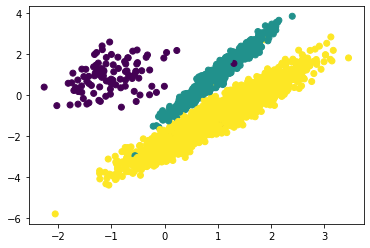

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter

# 创建数据集
x,y = make_classification(n_samples=5000,n_features=2,n_informative=2,n_redundant=0,n_repeated=0,n_classes=3,n_clusters_per_class=1,weights=[0.02,0.28,0.7],random_state=0)

# 统计类别中的个数
# Counter(y)   # Counter({2: 3484, 1: 1400, 0: 116})

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

##### 解决类别不平衡数据的方法
- 过采样
    - 即增加一些少数类样本使得正、反例数目接近，然后再进行学习。
    
    - 随机过采样方法
        - 随机过采样是在少数类中随机选择一些样本，然后通过复制所选择的样本生成样本集E,将它们添加到原少数类样本中来扩大原始数据集从而得到新的少数类集合。
        - 缺点：
            - 对于随机过采样，由于需要对少数类样本进行复制来扩大数据集，造成模型训练复杂度加大。
            - 另一方面也容易造成模型的过拟合问题，因为随机过采样是简单的对初始样本进行复制采样，这就使得学习器学得的规则过于具体化，不利于学习器的泛化性能，造成过拟合问题。
        - imblearn.over_sampling.RandomOverSampler

    - 过采样代表性算法：SMOTE算法
        - SMOTE全称是Synthetic Minority Oversampling即合成少数类过采样技术。
        - SMOTE算法是对随机过采样方法的一个改进算法，由于随机过采样方法是直接对少数类进行重采用，会使训练集中有很多重复的样本，容易造成产生的模型过拟合问题。而SMOTE算法的基本思想是对每个少数类样本xi，从它的最近邻中随机选择一个样本xi^( xi是少数类中的一个样本)，然后在xi和xi^之间的连线上随机选择一点作为新合成的少数类样本。
        - imblearn.over_sampling.SMOTE


- 欠采样
    - 即去除一些 多数类中的样本使得正例、反例数目接近，然后再进行学习。
    
    - 随机欠采样方法
        - 随机欠采样顾名思义即从多数类中随机选择一些样本组成样本集E。然后将样本集E从该多数类中移除。
        - imblearn.under_sampling.RandomUserSampler
        - 缺点：
            - 由于采样的样本集合要少于原来的样本集合，因此会造成一些信息缺失，即将多数类样本删除有可能会导致分类器丢失有关多数类的重要信息。


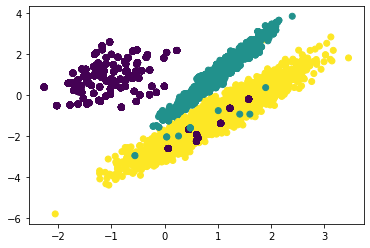

In [10]:
# 随机过采样

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

x_sample,y_sample = ros.fit_resample(x,y)

# Counter(y)   # Counter({1: 3485, 2: 3485, 0: 3485})

plt.scatter(x_sample[:,0],x_sample[:,1],c=y_sample)
plt.show()

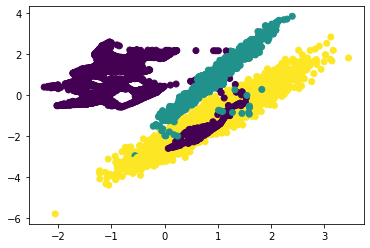

In [12]:
# SMOTE算法

from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_sample,y_sample = smote.fit_resample(x,y)

# Counter(y_sample)   # Counter({1: 3485, 2: 3485, 0: 3485})

plt.scatter(x_sample[:,0],x_sample[:,1],c=y_sample)
plt.show()

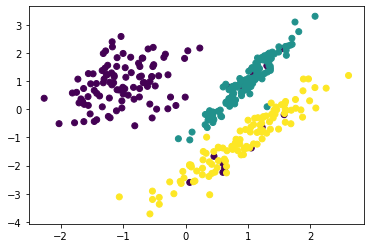

In [17]:
# 随机欠采样

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

x_sample,y_sample = rus.fit_resample(x,y)

plt.scatter(x_sample[:,0],x_sample[:,1],c=y_sample)
plt.show()

### 决策树算法
- 是一种树形结构，其中每个内部节点表示一个属性上的判断，每个分支代表一个判断结果的输出，最后每个叶节点代表一种分类结果，本质是一颗由多个判断节点组成的树。

#### 信息熵
- 物理学上，熵是“混乱”程度的量度。系统越有序，熵值越低;系统越混乱或者分散，熵值越高。

- 信息熵
    - 是度量样本集合纯度最常用的一种指标
    - 从信息的完整性上进行的描述
        - 当系统的有序状态一致时，数据越集中的地方熵值越小，数据越分散的地方熵值越大。
    - 从信息的有序性上进行的描述
        - 当数据量一致时,系统越有序，熵值越低;系统越混乱或者分散，熵值越高。
    - 公式：log以2为底，lg以10为底；D为样本总数，C^k为第k类样本数量  ![jupyter](./note_img/note_Entropy.png)
    
#### 决策树的划分依据一：信息增益-ID3决策树
- 公式：![jupyter](./note_img/note_InfoGain.png)


- 一般而言，信息增益越大，则意味着使用属性a来进行划分所获得的"纯度提升"越大。因此，我们可用信息增益来进行决策树的划分属性选择。


- 例子：![jupyter](./note_img/note_example1.png)  ![jupyter](./note_img/note_example2.png)  ![jupyter](./note_img/note_example3.png)  ![jupyter](./note_img/note_example4.png)

#### 决策树的划分依据二：信息增益率-C4.5决策树
- 实际上,信息增益准则对可取值数目较多的属性有所偏好，为减少这种偏好可能带来的不利影响，著名的C4.5决策树算法不直接使用信息增益，而是使用"增益率" (gain ratio)来选择最优划分属性
- 增益率：![jupyter](./note_img/note_GainRate.png)
- 例子：![jupyter](./note_img/note_example5.png)
- 例子：![jupyter](./note_img/note_example6.png)  ![jupyter](./note_img/note_example7.png)
- 为什么使用C4.5决策树算法比较好？
    - 1.⽤信息增益率来选择属性
        - 克服了⽤信息增益来选择属性时偏向选择值多的属性的不⾜。
    - 2.采⽤了⼀种后剪枝⽅法
        - 避免树的⾼度⽆节制的增⻓，避免过度拟合数据
    - 3.对于缺失值的处理
        - 在某些情况下，可供使⽤的数据可能缺少某些属性的值。假如〈x，c(x)〉是样本集S中的⼀个训练实例，但是其属性A的值A(x)未知。处理缺少属性值的⼀种策略是赋给它结点n所对应的训练实例中该属性的最常⻅值；
        - 另外⼀种更复杂的策略是为A的每个可能值赋予⼀个概率。例如，给定⼀个布尔属性A，如果结点n包含6个已知A=1和4个A=0的实例，那么A(x)=1的概率是0.6，⽽A(x)=0的概率是0.4。于是，实例x的60%被分配到A=1的分⽀，40%被分配到另⼀个分⽀。

#### 决策树的划分依据三：基尼指数-CART决策树
- CART决策树使用"基尼指数"来选择划分属性
- 基尼值Gini(D)：从数据集D中随机抽取两个样本，其类别标记不一致的概率。Gini(D)值越小，数据集D的纯度越高。
    - ![jupyter](./note_img/note_Gini.png)
- 基尼指数Gini_index(D)：选择使划分后基尼系数最小的属性作为最优化分属性。
    - ![jupyter](./note_img/note_GiniIndex.png)
- 例子：![jupyter](./note_img/note_example8.png)

#### 决策树的划分依据总结
- ![jupyter](./note_img/note_sum.png)
- 如何评价分割点的好坏
    - 如果一个分割点可以将当前的所有节点分为两类，使得每一类都很“纯”，也就是同一类的记录较多，那么就是一个好分割点。

#### Cart剪枝
- 剪枝是决策树学习算法对付"过拟合"的主要手段

- 预剪枝
    - 指在决策树生成过程中，对每个结点在划分前先进行估计，若当前结点的划分不能带来决策树泛化性能提升，则停止划分并将当前结点标记为叶结点
    - 优点：
        - 不仅降低了过拟合的风险,还显著减少了决策树的训练时间开销和测试时间开销
    - 缺点：
        - 有些分支的当前划分虽不能提升泛化性能、甚至可能导致泛化性能暂时下降,但在其基础上进行的后续划分却有可能导致性能显著提高
        - 预剪枝基于“贪心”本质禁止这些分支展开,给预剪枝决策树带来了欠拟合的风险.
    
- 后剪枝
    - 先从训练集生成一棵完整的决策树，然后自底向上地对非叶结点进行考察，若将该结点对应的子树替换为叶结点能带来决策树泛化性能提升，则将该子树替换为叶结点。
    - 后剪枝决策树通常比预剪枝决策树保留了更多的分支。
    - 优点：
        - 一般情形下，后剪枝决策树的欠拟合风险很小，泛化性能往往优于预剪枝决策树。
    - 缺点：
        - 但后剪枝过程是在生成完全决策树之后进行的，并且要自底向上地对树中的所有非叶结点进行逐一考察,因此其训练时间开销比未剪枝决策树和预剪枝决策树都要大得多。


- 关于预剪枝与后剪枝的例题：https://blog.csdn.net/zfan520/article/details/82454814/


#### 特征工程：特征提取
- 定义：将任意数据（如文本或图像）转换为可用于机器学习的数字特征。（注：特征值化是为了计算机更好的去理解数据）
- 特征提取分类
    - 字典特征提取
    - 文本特征提取
    - 图像特征提取

##### 字典特征提取
- sklearn.feature_extraction.DictVectorizer(sparse=True,...)
    - sparse：True表示是否返回sparse矩阵
    - DictVectorizer.fit_transform(X)
        - X：字典或者包含字典的迭代器
        - 返回：sparse矩阵
    - 属性：
        - DictVectorizer.get_feature_names()：返回类别名称

In [544]:
# 字典特征提取

from sklearn.feature_extraction import DictVectorizer

data = [
    {"city":"北京","temperature":100},
    {"city":"上海","temperature":50},
    {"city":"深圳","temperature":20}
]

# 1、实例化转换器对象：sparse=True
transform = DictVectorizer(sparse=True)
# 2、对数据进行提取
feature = transform.fit_transform(data)

print("特征名称：\n",transform.get_feature_names())
print("特征矩阵（sparse=True）：\n",feature)

# 1、实例化转换器对象：sparse=False
transform = DictVectorizer(sparse=False)
# 2、对数据进行提取
feature = transform.fit_transform(data)

print("特征名称：\n",transform.get_feature_names())
print("one-hot编码（sparse=False）：\n",feature)


特征名称：
 ['city=上海', 'city=北京', 'city=深圳', 'temperature']
特征矩阵（sparse=True）：
   (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	50.0
  (2, 2)	1.0
  (2, 3)	20.0
特征名称：
 ['city=上海', 'city=北京', 'city=深圳', 'temperature']
one-hot编码（sparse=False）：
 [[  0.   1.   0. 100.]
 [  1.   0.   0.  50.]
 [  0.   0.   1.  20.]]


##### 文本特征提取
- sklearn.feature_extraction.text.CountVectorizer(stop_words=[])
    - 返回词频矩阵
    - CountVectorizer.fit_transform(X)
        - X：文本或者包含文本字符串的可迭代对象
        - 返回值：返回sparse矩阵
    - CountVertorizer.get_feature_names()：返回单词列表

In [56]:
# 文本特征提取-英文

from sklearn.feature_extraction.text import CountVectorizer

data = ["life is is short,i like python","life is too long,i dislike python"]

# 1、实例化对象
transform = CountVectorizer(stop_words=["dislike"])    # 不对 "dislike" 进行统计
# transform = CountVectorizer(sparse=True)     # 报错，CountVectorizer()没有sparse参数，通过 toarray()对sparse矩阵转换为数组

# 2、提取文本数据
feature = transform.fit_transform(data)

print("返回特征名字\n",transform.get_feature_names())
print("文本抽取结果\n",feature)
print("文本抽取结果\n",feature.toarray())

返回特征名字
 ['is', 'life', 'like', 'long', 'python', 'short', 'too']
文本抽取结果
   (0, 1)	1
  (0, 0)	2
  (0, 5)	1
  (0, 2)	1
  (0, 4)	1
  (1, 1)	1
  (1, 0)	1
  (1, 4)	1
  (1, 6)	1
  (1, 3)	1
文本抽取结果
 [[2 1 1 0 1 1 0]
 [1 1 0 1 1 0 1]]


In [83]:
# 文本特征提取-中文
'''
在对英文进行分词时，英文自带空格，所以可以进行特征提取
若需要对中文进行特征提取，但是中文没有空格，需要使用jieba分词对中文进行分词，然后将分词结果用空格进行连接，之后在进行特征提取
'''

from sklearn.feature_extraction.text import CountVectorizer
import jieba


data = ["⼀种还是⼀种今天很残酷，明天更残酷，后天很美好，但绝对⼤部分是死在明天晚上，所以每个⼈不要放弃今天。",
"我们看到的从很远星系来的光是在⼏百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
"如果只⽤⼀种⽅式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]

seg = []

# 将列表中元素，依次分词
for i in data:
    '''
     思路：对列表中每个元素（即每一个句子）进行中文分词，然后用空格对每个分词进行连接
    '''
    l = " ".join(jieba.lcut(i))
    seg.append(l)


# 实例化对象
vector = CountVectorizer()
feature = vector.fit_transform(seg)

print("特征名称：\n",vector.get_feature_names())
print("特征提取结果：\n",feature)
print("特征提取结果数组形式：\n",feature.toarray())


特征名称：
 ['不会', '不要', '之前', '了解', '事物', '今天', '光是在', '发出', '取决于', '后天', '含义', '如何', '如果', '宇宙', '我们', '所以', '放弃', '明天', '星系', '晚上', '某样', '残酷', '每个', '百万年', '看到', '真正', '秘密', '绝对', '美好', '联系', '过去', '还是', '这样', '部分']
特征提取结果：
   (0, 31)	1
  (0, 5)	2
  (0, 21)	2
  (0, 17)	2
  (0, 9)	1
  (0, 28)	1
  (0, 27)	1
  (0, 33)	1
  (0, 19)	1
  (0, 15)	1
  (0, 22)	1
  (0, 1)	1
  (0, 16)	1
  (1, 14)	3
  (1, 24)	2
  (1, 18)	1
  (1, 6)	1
  (1, 23)	1
  (1, 2)	1
  (1, 7)	1
  (1, 32)	1
  (1, 13)	1
  (1, 30)	1
  (2, 14)	1
  (2, 12)	1
  (2, 3)	4
  (2, 20)	1
  (2, 4)	3
  (2, 0)	1
  (2, 25)	2
  (2, 10)	1
  (2, 26)	1
  (2, 8)	1
  (2, 11)	1
  (2, 29)	1
特征提取结果数组形式：
 [[0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 1 1 2 0 1 0 2 1 0 0 0 0 1 1 0 0 1 0 1]
 [0 0 1 0 0 0 1 1 0 0 0 0 0 1 3 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0 1 0 1 0]
 [1 0 0 4 3 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 2 1 0 0 1 0 0 0 0]]


##### TF-IDF文本特征提取
- 主要思想：如果某个词或短语在一篇文章中出现的概率高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来分类。
- TF-IDF作用：用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。
- 公式：
    - 词频(Term Frequency，tf)：某一个给定的词语在该文件中出现的频率
    - 逆向文档频率(Inverse Document Frequency, idf)：一个词语普遍重要性的度量。某一特定词语的idf，可以由总文件数目除以包含该词语的文件数目，再将得到的商取以10为底的对数得到
    - ![jupyter](./note_img/note_tfidf.png)
    - 最终结果可以理解为重要程度
    - 举例：![jupyter](./note_img/note_tfidfexample.png)
- sklearn.feature_extraction.text.TfidfVectorizer

In [85]:
# Td-idf

from sklearn.feature_extraction.text import TfidfVectorizer
import jieba

data = ["⼀种还是⼀种今天很残酷，明天更残酷，后天很美好，但绝对⼤部分是死在明天晚上，所以每个⼈不要放弃今天。",
"我们看到的从很远星系来的光是在⼏百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
"如果只⽤⼀种⽅式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]

seg = []

for i in data:
    seg.append(" ".join(jieba.lcut(i)))

# 实例化特征提取对象
vector = TfidfVectorizer()
feature = vector.fit_transform(seg)
print("特征名称：\n",vector.get_feature_names())
print("特征提取结果：\n",feature)
print("特征提取结果数组形式：\n",feature.toarray())
    

特征名称：
 ['不会', '不要', '之前', '了解', '事物', '今天', '光是在', '发出', '取决于', '后天', '含义', '如何', '如果', '宇宙', '我们', '所以', '放弃', '明天', '星系', '晚上', '某样', '残酷', '每个', '百万年', '看到', '真正', '秘密', '绝对', '美好', '联系', '过去', '还是', '这样', '部分']
特征提取结果：
   (0, 16)	0.21320071635561044
  (0, 1)	0.21320071635561044
  (0, 22)	0.21320071635561044
  (0, 15)	0.21320071635561044
  (0, 19)	0.21320071635561044
  (0, 33)	0.21320071635561044
  (0, 27)	0.21320071635561044
  (0, 28)	0.21320071635561044
  (0, 9)	0.21320071635561044
  (0, 17)	0.4264014327112209
  (0, 21)	0.4264014327112209
  (0, 5)	0.4264014327112209
  (0, 31)	0.21320071635561044
  (1, 30)	0.24108220270067757
  (1, 13)	0.24108220270067757
  (1, 32)	0.24108220270067757
  (1, 7)	0.24108220270067757
  (1, 2)	0.24108220270067757
  (1, 23)	0.24108220270067757
  (1, 6)	0.24108220270067757
  (1, 18)	0.24108220270067757
  (1, 24)	0.48216440540135513
  (1, 14)	0.5500476874707075
  (2, 29)	0.16312888234528164
  (2, 11)	0.16312888234528164
  (2, 8)	0.16312888234528164
  (2, 2

#### 决策树API
- sklearn.tree.DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=None)
    - criterion：'gini'、'entropy'
        - gini：基尼指数
        - entropy：信息增益
    - 其余参数：见官方文档 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

#### 泰坦尼克号乘客生存预测
- https://www.kaggle.com/c/titanic/overview
- 解题：https://blog.csdn.net/han_xiaoyang/article/details/49797143
![](./note_img/note_TitanicNote.png)

- 现在，按照简单的来做

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,classification_report
# 1、获取数据
data_train_origin = pd.read_csv("./data/Titanic/train.csv")


# 2、数据基本处理
# 2.1、获取需要的特征属性
data_train = data_train_origin[["Pclass","Sex","Age","Fare","Survived"]]

# 2.2、处理缺失值Age
data_train["Age"] = data_train["Age"].fillna(value=data_train["Age"].mean())

# 2.3、获取特征值和目标值
x = data_train[["Pclass","Sex","Age","Fare"]]
x["Pclass"] = x["Pclass"].replace({1:"1",2:"2",3:"3"})
y = data_train["Survived"]

# 2.3、数据分割。在此我们不对数据做分割，分为训练集和测试集。我们就把该data_train数据作为训练集，将data_test作为测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)


# 3、特征工程-特征提取、标准化
# 3.1、 特征提取：特征中出现类别符号，需要进⾏one-hot编码处理(两种方法：DictVectorizer()，pd.get_dummies())
dummies_train = pd.get_dummies(x_train[["Sex","Pclass"]])
dummies_test = pd.get_dummies(x_test[["Sex","Pclass"]])
# 3.1.1 将特征数据与one-hot数据进行连接
x_train = pd.concat([x_train,dummies_train],axis=1)
x_test = pd.concat([x_test,dummies_test],axis=1)
# 3.1.2 将转换了one-hot编码的列，进行删除
x_train.drop(labels=["Pclass","Sex"],axis=1,inplace=True)
x_test.drop(labels=["Pclass","Sex"],axis=1,inplace=True)

# 3.2、标准化
scaler = StandardScaler()
x_train[["Age","Fare"]] = scaler.fit_transform(x_train[["Age","Fare"]])
x_test[["Age","Fare"]] = scaler.fit_transform(x_test[["Age","Fare"]])

# 4、机器学习
estimator = DecisionTreeClassifier()
estimator.fit(x_train,y_train)



# 5、模型评估
y_pre = estimator.predict(x_test)

score = estimator.score(x_test,y_test)

print(score)    # 0.7039106145251397


'''
# 对测试数据进行操作

data_test_origin = pd.read_csv("./data/Titanic/test.csv")
data_test = data_test_origin[["Pclass","Sex","Age","Fare"]]
data_test["Age"] = data_test["Age"].fillna(value=data_test["Age"].mean())
data_test["Fare"] = data_test["Fare"].fillna(value=data_test["Fare"].mean())
x_test = data_test[["Pclass","Sex","Age","Fare"]]
x_test["Pclass"] = x_test["Pclass"].replace({1:"1",2:"2",3:"3"})
dummies_test = pd.get_dummies(x_test[["Sex","Pclass"]])
x_test = pd.concat([x_test,dummies_test],axis=1)
x_test.drop(labels=["Pclass","Sex"],axis=1,inplace=True)
x_test[["Age","Fare"]] = scaler.fit_transform(x_test[["Age","Fare"]])

y_pre = estimator.predict(x_test)

result_df.to_csv("./data/Titanic/resultPred.csv",index=False)
'''

0.7039106145251397


C:\Users\Taylor\AppData\Local\Temp/ipykernel_9024/269914331.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["Age"] = data_train["Age"].fillna(value=data_train["Age"].mean())
C:\Users\Taylor\AppData\Local\Temp/ipykernel_9024/269914331.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Pclass"] = x["Pclass"].replace({1:"1",2:"2",3:"3"})


'\n# 对测试数据进行操作\n\ndata_test_origin = pd.read_csv("./data/Titanic/test.csv")\ndata_test = data_test_origin[["Pclass","Sex","Age","Fare"]]\ndata_test["Age"] = data_test["Age"].fillna(value=data_test["Age"].mean())\ndata_test["Fare"] = data_test["Fare"].fillna(value=data_test["Fare"].mean())\nx_test = data_test[["Pclass","Sex","Age","Fare"]]\nx_test["Pclass"] = x_test["Pclass"].replace({1:"1",2:"2",3:"3"})\ndummies_test = pd.get_dummies(x_test[["Sex","Pclass"]])\nx_test = pd.concat([x_test,dummies_test],axis=1)\nx_test.drop(labels=["Pclass","Sex"],axis=1,inplace=True)\nx_test[["Age","Fare"]] = scaler.fit_transform(x_test[["Age","Fare"]])\n\ny_pre = estimator.predict(x_test)\n\nresult_df.to_csv("./data/Titanic/resultPred.csv",index=False)\n'

#### 决策树可视化
- 把tree.dot文件内容放在 http://webgraphviz.com/ 展示
- sklearn.tree.export_graphviz(extimator,out_file="tree.dot",feature_names=["age, Pclass=1,Pclass=2"])


In [11]:
import sklearn.tree as tree

tree.export_graphviz(estimator, out_file="tree.dot")

#### 回归决策树
- 关于数据类型，我们可以将其分为两大类：连续性数据和离散型数据。在面对不同数据时，决策树也分为两大类：分类决策树（处理离散型数据）和回归决策树（处理连续性数据）
- 原理概述：
    - 不管是是回归决策树还是分类决策树，都存在两个核心问题：
        - 如何选择划分点？
        - 如何决定叶节点的输出值？
    - 分类树中，我们采用信息论中的方法，通过计算选择最佳划分点。
    - 一个回归树对应着输入空间(即特征空间)的一个划分以及在划分单元上的输出值。在回归树中，采用的是启发式的方法。假如我们有n个特征，每个特征有si(i ∈(1, n))个取值，那我们遍历所有特征，尝试该特征所有取值，对空间进行划分，直到取到特征j的取值s，使得损失函数最小，这样就得到了一个划分点。描述该过程的公式如下: ![jupyter](./note_img/note_decisiontreeformula.png)
    - 假设将输入空间划分为M个单元: R1, R2.... Rm，那么每个区域的输出值就是: cm = avg(ji|xi∈Rm)也就是该区域内所有点y值的平均数。

##### 回归决策树与线性回归对比：通过代码演示

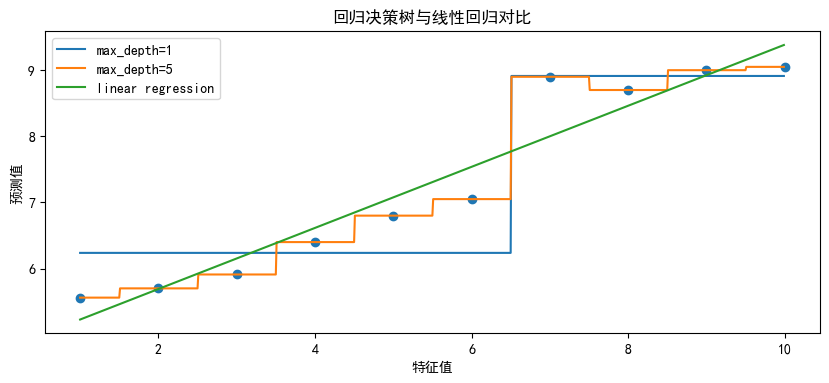

In [727]:
# 回归决策树与线性回归对比
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

x = np.array(list(range(1,11))).reshape(-1,1)
y = [5.56,5.70,5.91,6.40,6.80,7.05,8.90,8.70,9.00,9.05]

m1 = DecisionTreeRegressor(max_depth=1)
m2 = DecisionTreeRegressor(max_depth=5)
m3 = LinearRegression()

m1.fit(x,y)
m2.fit(x,y)
m3.fit(x,y)

# 使用不同模型，对数据进行预测
x_test = np.arange(1,10,0.01).reshape(-1,1)
y1_pre = m1.predict(x_test)
y2_pre = m2.predict(x_test)
y3_pre = m3.predict(x_test)

# 画图，使数据更加直观
plt.figure(figsize=(10,4),dpi=100)

plt.scatter(x,y)
plt.plot(x_test,y1_pre,label="max_depth=1")
plt.plot(x_test,y2_pre,label="max_depth=5")
plt.plot(x_test,y3_pre,label="linear regression")
plt.xlabel("特征值")
plt.ylabel("预测值")
plt.title("回归决策树与线性回归对比")
plt.legend()

plt.show()


### 集成学习
- 集成学习通过建立几个模型来解决单一预测问题。它的工作原理是生成多个模型，各自独立地学习和作出预测。这些预测最后结合成组合预测，因此优于任何一个单分类的做出预测。
- 集成学习中Boosting和Bagging
    - 欠拟合问题：弱弱组合变强，主要方法：Boosting逐步增强学习
    - 过拟合问题：互相遏制变壮，主要方法：Bagging采样学习集成
- 只要单分类器的表现不太差，集成学习的结果总是好于单分类器

#### Bagging和随机森林

##### Bagging算法
- 学习器之间不存在依赖关系和可以并行生成学习器。给定包含m个样本的数据集，我们先随机取出一个样本放入采样中，再把该样本放回初始数据集，使得下次采样时该样本仍有可能被选中。这样，经过m次随机采样操作，我们得到含m个样本的采样集，初始训练集中有的样本在采样集里多次出现，有的则从未出现。初始训练集中约有63.2%的样本出现在采样集中。照这样，我们可采样出T个含m个训练样本的采样集，然后基于每个采样集训练出一个基学习器，再将这些基学习器进行结合。

- Bagging集成优点
    - Bagging +决策树/线性回归/逻辑回归/深度学习... = Bagging集成学习方法
    - 经过上述组成的集成学习方法：
        - 均可在原有算法上提高2%左右的泛化正确率
        - 简单、方便、通用

##### 随机森林算法
- 在机器学习中，随机森林是一个包含多个决策树的分类器，并且其输出的类别是由个别树输出的类别的众数而定。随机森林 = Bagging + 决策树   ![jupyter](./note_img/note_randomforestprocess.png) 例如，如果你训练了5个树，其中有4个树的结果是True, 1个树的结果是False,那么最终投票结果就是True
- 随机森林构造的关键步骤（M表示特征数量）
    - 1)一次随机选出一个样本，有放回的抽样，重复N次(有可能出现重复的样本)
    - 2)随机去选出m个特征, m << M，建立决策树

- 包外估计：前面在自助法中已提到，这里不再讲述
    - 用途：
        - 当基学习器是决策树时，可使用包外样本来辅助剪枝，或用于估计决策树中各结点的后验概率以辅助对零训练样本结点的处理
        - 当基学习器是神经网络时，可使用包外样本来辅助早期停止以减小过拟合

##### 随机森林API
- sklearn.ensemble.RandomForestClassifier(n_estimators=10,criterion="gini",max_depth=None,bootstrap=True,min_samples_split=2)
    - n_estimators：森林中决策树的数量。利用最大投票数或平均值来预测
    - criterion：分割特征的测量方法
    - max_depth：树的最大深度
    - max_features："auto"，每个决策树的最大特征数量
        - "auto"：sqrt(n_features)
        - "sqrt"：sqrt(n_features)，类似于"auto"
        - "log2"：sqrt(n_features)
        - None：sqrt(n_features)
    - bootstrap：boolean值，是否在构建树时有放回抽样
    - min_samples_split：内部节点再划分所需最小样本数
    - min_samples_leaf：叶节点的最小样本数
    - min_impurity_split：节点划分的最小不纯度（不推荐改动），这个值限制了决策树的增长，如果某节点的不纯度(基于基尼系数，均方差)小于这个阈值，则该节点不再生成子节点，即为叶子节点。

In [736]:
# 随机森林（基于Bagging算法实现）

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 将Titanic数据导入：直接使用：x_train、x_test、y_trian、y_test


# 机器学习-随机森林
rfc = RandomForestClassifier()
param = {"n_estimators":[100,300,500],"max_depth":[5,10,15]}
estimator = GridSearchCV(rfc,param_grid=param,cv=3)
estimator.fit(x_train,y_train)

# 模型评估
score = estimator.score(x_test,y_test)
print(score)


0.8100558659217877


#### otto案例：Otto Group Product Classification Challenge
- https://www.kaggle.com/c/otto-group-product-classification-challenge/overview
- 93个特征，9个类别

In [131]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder    # 将目标值转换为数字
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [132]:
# 1、获取数据
data = pd.read_csv("./data/Otto/train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


- 我们需要查看不同类别包含的商品个数，方便进行判断

E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


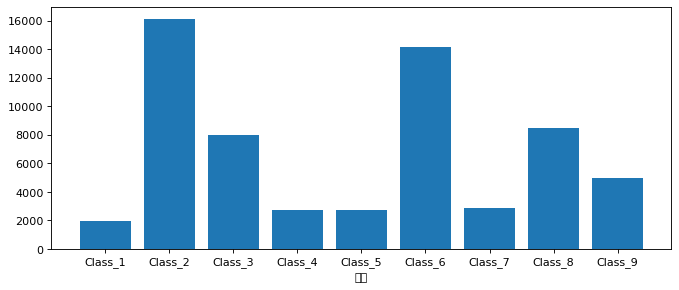

In [133]:
plt.figure(figsize=(10,4),dpi=80)

# 获取x轴、y轴数据
x = sorted(data["target"].unique())
y = data["target"].value_counts().sort_index()

plt.bar(x,height=y)

plt.xlabel("类别")
plt.xlabel("数量")

plt.show()

In [134]:
# 2、数据基本处理

# 2.1 截取部分数据，使用随机欠采样获取数据
rus = RandomUnderSampler()
x,y = rus.fit_resample(data.iloc[:,1:-1],data["target"])

# 2.2 把目标值中Class_1等字符，转换为数字。sklearn.preprocessing.LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 2.3 分割数据
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)


In [135]:
# 机器学习-随机森林
rf = RandomForestClassifier(oob_score=False)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [136]:
# 模型评估
y_pre = rf.predict(x_test)

rf.score(x_test,y_test)

0.7788655341203571

In [139]:
# 使用 logloss模型评估
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder

# log_loss(y_test,y_pre,eps=1e-15)   # 报错，需要将传入数据写为 one-hot编码形式

one_hot = OneHotEncoder(sparse=False)
y_test2 = one_hot.fit_transform(y_test.reshape(-1,1))
y_pre2 = one_hot.fit_transform(y_pre.reshape(-1,1))

log_loss(y_test2,y_pre2)

7.637713870225003

##### 模型调优
- n_estimators、max_feature、max_depth、min_samples_leaf

E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


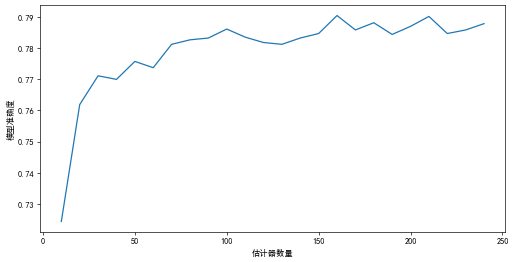

In [875]:
# 展示n_estimators参数，其余参数类似该调优过程，这里不作展示

# 为方便进行画图展示，将每个模型的准确度放入列表中
score_list = []

n_estimator = list(range(10,250,10))

for i,one_estimator in enumerate(n_estimator):
    estimator = RandomForestClassifier(n_estimators=one_estimator,oob_score=True,n_jobs=-1)
    estimator.fit(x_train,y_train)
    
    score = estimator.score(x_test,y_test)
    
    score_list.append(score)
    

# 画图
plt.figure(figsize=(10,5),dpi=60)

x = n_estimator
y = score_list

plt.plot(x,y)

plt.xlabel("估计器数量")
plt.ylabel("模型准确度")

plt.show()

- 使用交叉验证进行调优

In [891]:
from math import sqrt

rf = RandomForestClassifier(n_jobs=-1)

param = {"n_estimators":list(range(100,300,10)),"max_depth":list(range(1,20,3)),
         "min_samples_leaf":list(range(1,5)),"max_features":list(range(1,int(sqrt(x_train.columns.size))))}
estimator = GridSearchCV(estimator=rf,param_grid=param)

estimator.fit(x_train,y_train)



print(estimator.best_estimator_)
print(estimator.best_params_)

# 训练太慢了


KeyboardInterrupt: 

#### Boosting
- 随着学习的积累从弱到强，每新加入一个弱学习器，整体能力就会得到提升
- 代表算法：Adaboost、GDBT、XGBoost、LightGBM

##### Bagging集成与Boosting集成的区别
- 数据方面
    - Bagging：对数据进行采样
    - Boosting：根据前一轮学习结果调整数据的重要性

- 投票方面
    - Bagging：所有学习器平权投票
    - Boosting：对学习器进行加权投票

- 学习顺序
    - Bagging：学习是并行的，每个学习器没有依赖关系
    - Boosting：学习是串行的，学习有先后顺序

- 主要作用
    - Bagging：主要用于提高泛化性能（解决过拟合，也可以说降低方差）
    - Boosting：主要用于提高训练精度（解决欠拟合，也可以说降低偏差）

##### AdaBoost
- ![jupyter](./note_img/note_AdaBoost.png) 
- 关键点剖析：![jupyter](./note_img/note_AdaBoostKey.png)
    
##### AdaBoost的API
- sklearn.ensemble.AdaBoostClassifier


##### GBDT
- GBDT的全称是Gradient Boosting Decision Tree，梯度提升树，在传统机器学习算法中，GBDT算的上TOP3的算法。
- GBDT使用的决策树是CART回归树，无论是处理回归问题还是二分类以及多分类，GBDT使用的决策树都是CART回归树。
- 在分类树中最佳划分点的判别标准是熵或者基尼系数，都是用纯度来衡量的，但是在回归树中的样本标签是连续数值，所以使用熵之类的指标不再合适，取而代之的是平方误差，它能很好的评判拟合程度。

- Gradient Boosting
    - 梯度提升树是提升树的一种改进算法
    - 提升树算法：![jupyter](./note_img/note_boostingTree.png) 
    - 残差：![jupyter](./note_img/note_residual.png)


### 聚类算法
- 一种典型的无监督学习算法，主要用于将相似的样本自动归到一个类别中。在聚类算法中根据样本之间的相似性，将样本划分到不同的类别中，对于不同的相似度计算方法，会得到不同的聚类结果，常用的相似度计算方法有欧式距离法。

- 实现流程：
    - 1、随机设置K个特征空间内的点作为初始的聚类中心
    - 2、对于其他每个点计算到K个中心的距离，未知的点选择最近的一个聚类中心点作为标记类别
    - 3、接着对着标记的聚类中心之后，重新计算出每个聚类的新中心点(平均值)
    - 4、如果计算得出的新中心点与原中心点一样(质心不再移动)，那么结束，否则重新进行第二步过程

- 注意：
    - 由于每次都要计算所有的样本与每一个质心之间的相似度，故在大规模的数据集上，K-Means算法的收敛速度比较慢。


#### 聚类算法的API
- sklearn.cluster.KMeans(n_clusters=8)
    - n_clusters：开始的聚类中心数量
    - 方法：
        - fit(x)
        - predict(x)
        - fit_predict(x)：相当于先调用fit(x)，再调用predict(x)

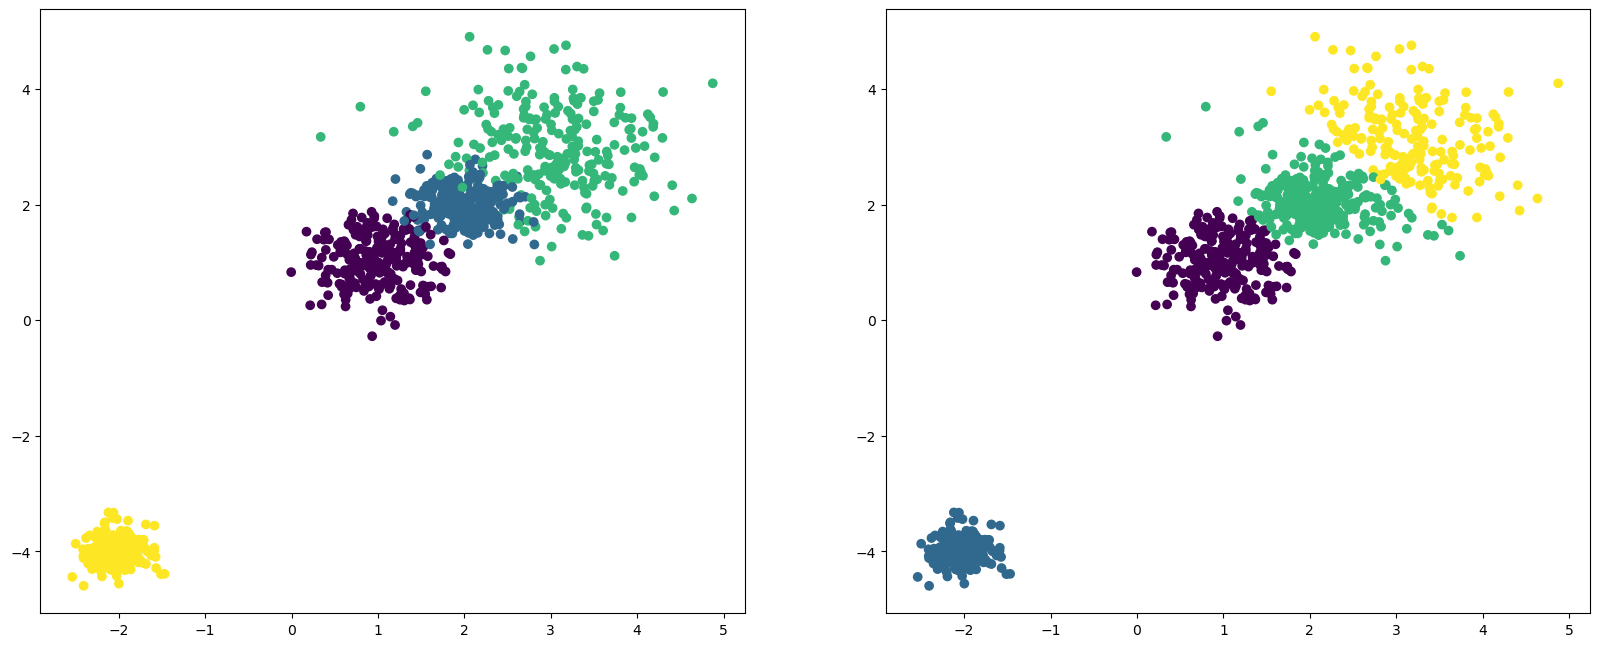

10546.796486547755


In [97]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 创建数据集 
x,y = make_blobs(n_samples=1000,n_features=4,centers=[(1,1),(2,2),(3,3),(-2,-4)],cluster_std=[0.4,0.3,0.7,0.2],random_state=20)

# 画图
plt.figure(figsize=(20,8),dpi=100)
plt.subplot(121)
plt.scatter(x[:,0],x[:,1],c=y)

# KMeans进行评估
estimator = KMeans(n_clusters=4,random_state=20)
y_pre = estimator.fit_predict(x)

# 画图
plt.subplot(122)
plt.scatter(x[:,0],x[:,1],c=y_pre)
plt.show()

# 使用 Calinski Harabasz 模型评估
print(calinski_harabasz_score(x,y_pre))


#### 模型评估
- SSE（误差平方和）： ![jupyter](./note_img/note_SSE.png)


- 肘方法（Elbow method）：K值确定，下降率突然变缓时即认为是最佳K值 ![jupyter](./note_img/note_ElbowMethod.png)
    - 1、对于n个点的数据集，迭代计算k from 1 to n,每次聚类完成后计算每个点到其所属的簇中心的距离的平方和
    - 2、平方和是会逐渐变小的，直到k==n时平方和为0,因为每个点都是它所在的簇中心本身。
    - 3、在这个平方和变化过程中，会出现一个拐点也即“肘”点，下降率突然变缓时即认为是最佳的k值。
    - 在决定什么时候停止训练时，肘形判据同样有效，数据通常有更多的噪音，在增加分类无法带来更多回报时，我们停止增加类别。


- 轮廓系数法（Silhouette Coefficient）：![jupyter](./note_img/note_SC.png) 目的：内部距离最小化，外部距离最大化


- CH系数（Calinski-Harabasz）
    - 类别内部数据的协方差越小越好，类别之间的协方差越大越好。那么，Calinski-Harabasz分数会高，表明聚类效果好。![](./note_img/note_CH.png)
    - 目的：用尽量少的类别聚类尽量多的样本，同时获得较好的聚类效果


#### 算法优化
- Canopy算法：Canopy粗聚类配合kmeans
- KMeans++：距离越远越容易成为新的质心
- 二分K-Means：拆除SSE最大的簇
- k-medoids：和kmeans选取中心点的方式不同
- kernel kmeans：映射到高维空间
- ISODATA：动态聚类，可以更改K值大小
- Mini-batch K-Means：一大数据集分批聚类

#### 特征降维
- 定义：降维是指在某些限定条件下，降低随机变量(特征)个数，得到一组“不相关”主变量的过程
    - 降低随机变量个数
    - 相关特征
        - 例如：相对湿度与降雨量之间的相关性
        - 其他情况


- 正是因为在进行训练时，我们都是使用特征进行学习。如果特征本身存在问题或者特征之间相关性较强，对于算法学习预测会影响较大


##### 降维的两种方式：特征选择、主成分分析

###### 特征选择
- 定义：数据中包含冗余或无关变量(或称特征、属性、指标等)，旨在从原有特征中找出主要特征。
- 方法：
    - Filter（过滤式）：主要探究特征本身特点、特征与目标值之间的关联
        - 方法选择法：低方差特征过滤
        - 相关系数：
            - 主要实现方式：皮尔逊相关系数、斯皮尔曼相关系数
    - Embedded（嵌入式）：算法自动选择特征（特征与目标值之间的关联）
        - 决策树：信息熵，信息增益
        - 正则化：L1、L2
        - 深度学习：卷积等等

- 低方差特征过滤：
     - 删除低方差的一些特征
         - 特征方差小：某个特征大多样本的值比较相近
         - 特征方差大：某个特征很多样本的值都有差别
    - sklearn.feature_selection.VarianceThreshold(threshold=0)
        - 删除所有低方差特征
        - threshold：低于该值进行删除。默认值为0，则删除样本中所有相同方差的特征。

- 皮尔逊相关系数
    - 反映变量之间相关关系密切程度的统计指标
    - 相关系数的值在[-1,1]范围，当0<|r|<1时，表示两变量存在一定程度的相关。且|r|越接近1,两变量间线性关系越密切; |r|越接近于0，表示两变量的线性相关越弱。一般可按三级划分: |r|<0.4为低度相关; 0.4<|r|<0.7为 显著性相关; 0.7<|r|<1为高度线性相关
    - scipy.stats.pearsonr(x,y)
        - 判断x，y之间的相关性
        - 返回：
            - r：float，皮尔逊的相关系数，[-1，1]之间。
            - p-value：float，注： p值越小，表示相关系数越显著，一般p值在500个样本以上时有较高的可靠性。

- 斯皮尔曼相关系数
    - 反映变量之间相关关系密切程度的统计指标
    - 斯皮尔曼相关系数表明X (自变量)和Y (因变量)的相关方向。如果当X增加时，Y趋向于增加,斯皮尔曼相关系数则为正。相关系数的值在[-1,1]范围
    - scipy.stats.spearmanr



In [70]:
# 低方差特征过滤

import pandas as pd
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("./data/factor_returns.csv")

transform = VarianceThreshold(1)
x = transform.fit_transform(data.iloc[:,1:10])

print(data.iloc[:,1:10].shape)   # 特征过滤前
print(x.shape)                   # 特征过滤后

(2318, 9)
(2318, 8)


In [72]:
# 皮尔逊相关系数

import pandas as pd
from scipy.stats import pearsonr

x1 = [12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9]
x2 = [21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]

r,p = pearsonr(x1,x2)

print(r,p)

0.9941983762371884 4.922089955456964e-09


In [74]:
# 斯皮尔曼相关系数

from scipy.stats import spearmanr

x1 = [12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9]
x2 = [21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]

r,p = spearmanr(x1,x2)

print(r,p)

0.9999999999999999 6.646897422032013e-64


###### 主成分分析
- 定义：高维数据转化为低维数据的过程，在此过程中可能会舍弃原有数据、创造新的变量
- 作用：是数据维数压缩，尽可能降低原数据的维数(复杂度)，损失少量信息
- 应用：回归分析、聚类分析

###### 主成分分析的API
- sklearn.decomposition.PCA(n_components=None)
    - 将数据分解为较低维度数据
    - n_components：
        - 小数：保留百分之多少的信息
        - 整数：减少到多少特征

In [78]:
# 主成分分析
from sklearn.decomposition import PCA

data = [[2,8,4,5], [6,3,0,8], [5,4,9,1]]

transform = PCA(0.9)
trans_data = transform.fit_transform(data)
print("保留90%的数据：\n",trans_data)

transform = PCA(3)
trans_data = transform.fit_transform(data)
print("将数据的特征保留3个：\n",trans_data)


保留90%的数据：
 [[-3.13587302e-16  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
将数据的特征保留3个：
 [[-3.13587302e-16  3.82970843e+00  4.59544715e-16]
 [-5.74456265e+00 -1.91485422e+00  4.59544715e-16]
 [ 5.74456265e+00 -1.91485422e+00  4.59544715e-16]]


#### 案例：探究用户对物品类别的喜好划分
- https://www.kaggle.com/c/instacart-market-basket-analysis/data
- 仔细阅读与数据相关的信息

### 朴素贝叶斯
- 假定特征与特征之间是相互独立的

#### 拉普拉斯平滑系数
- ![jupyter](./note_img/note_Laplace.png)

#### 朴素贝叶斯的API
- sklearn.naive_bayes.MultinomialNB(alpha=1.0)
    - 朴素贝叶斯分类
    - alpha：拉普拉斯平滑系数

#### 优缺点
- 优点
    - 朴素贝叶斯模型发源于古典数学理论，有稳定的分类效率
    - 对缺失数据不太敏感，算法也比较简单，常用于文本分类
    - 分类准确度高，速度快
- 缺点
    - 由于使用了样本属性独立性的假设，所以如果特征属性有关联时其效果不好
    - 需要计算先验概率，而先验概率很多时候取决于假设，假设的模型可以有很多种，因此在某些时候会由于假设的先验模型的原因导致预测效果不佳

In [127]:
# 练习：情感分析

import pandas as pd
import jieba
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score

# 获取数据
data = pd.read_csv("./data/书籍评价.csv",encoding="gbk")
data.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

# 数据基本处理

# 将 “评价”列 变为数字
encoder = LabelEncoder()
data["评价"] = encoder.fit_transform(data["评价"])     # 0：好评，1：差评

# 加载停用词
stopwords = []
with open("./data/stopwords.txt",encoding="utf8") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        stopwords.append(line)

# 对 “内容”列 进行分词
contents = []
for content in data["内容"]:
    content = content.strip()
    seg = " ".join(jieba.cut(content))
    contents.append(seg)
data.drop(labels=["内容"],axis=1,inplace=True)

# 对分词结果进行转化
vectorizer = CountVectorizer(stop_words=stopwords)
x = vectorizer.fit_transform(contents)

# 将转化后结果输入到data中
data[vectorizer.get_feature_names()] = 0
# 将 “评价”列 移动到最后一列
content = data.pop("评价")
data["评价"] = content

# 将分词结果输入到data中
for row in data.index:
    data.iloc[row,:37] = x.toarray()[row]

# 分割数据
x_train = data.iloc[:10,:37]
y_train = data.iloc[:10,37]
x_test = data.iloc[11:,:37]
y_test = data.iloc[11:,37]

# 机器学习-朴素贝叶斯
estimator = MultinomialNB(alpha=1)
estimator.fit(x_train,y_train)
# 预测
y_pre = estimator.predict(x_test)

# 模型评估
estimator.score(x_test,y_test)

E:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


1.0

### 支持向量机
- 定义：寻找到一个超平面使样本分成两类，并间隔最大
- SVM能够执行线性或非线性分类、回归，甚至是异常值检测任务。它是机器学习领域最受欢迎的模型之一。SVM特别适用于中小型复杂数据集的分类。
- 支持向量：接近超平面/决策边界的数据的子集
- 基于二维空间：
    - 该直线分开了两类
    - 该直线最大化间隔
    - 该直线处于间隔的中间，到所有支持向量距离相等
- 硬间隔
    - 完全分类准确，其损失函数不存在；其损失值为0；只要找出两个异类正中间的那个平面
    
- 软间隔
    - 尽可能在保持最大间隔宽阔和限制间隔违例(即位于最大间隔之上，甚至在错误的一边的实例)之间找到良好的平衡，这就是软间隔分类。
    - 通过超参数C（惩罚因子）控制该平衡：C值越小，间隔越宽，但是间隔违例也会越多

#### SVM算法原理
- 算法原理链接：https://zhuanlan.zhihu.com/p/31886934

#### SVM的损失函数
- 主要讨论三种损失函数：
    - 相关概念自行百度
    - ![](./note_img/note_lossfunction.png)

#### SVM的核函数
- 由低维向高维的映射，该映射可以把低维空间中线性不可分的两类点变成线性可分的。
- 常见核函数：![](./note_img/note_kernelfunction.png)
- 在什么情况下使用：
    - 如果特征的数量很大，甚至和样本数量差不多时,往往线性可分，这时选用LR或者线性核Linear
    - 如果特征的数量很小，样本数量正常，不算多也不算少，这时选用RBF核
    - 如果特征的数量很小，而样本的数量很大，这时手动添加一些特征, 使得线性可分，然后选用LR或者线性核Linear
    - 多项式核一般很少使用，效率不高，结果也不优于RBF;
    - Linear核参数少，速度快；RBF核参数多，分类结果非常依赖于参数，需要交叉验证或网格搜索最佳参数，比较耗时
    - 应用最广的应该就是RBF核，无论是小样本还是大样本，高维还是低维等情况，RBF核函数均适

#### SVM回归
- 让尽可能多的实例位于预测线上，同时限制间隔违例。线距的宽度由超参数ε控制

#### SVM的API
- SVM方法既可以用于分类(二/多分类)，也可用于回归和异常值检测。
- SVM具有良好的鲁棒性,对未知数据拥有很强的泛化能力，特别是在数据量较少的情况下，相较其他传统机器学习算法具有更优的性能。


- 使用SVM作为模型，具体流程如下：
    - 1、对样本数据进行归一化
    - 2、应用核函数对样本进行映射(最 常采用和核函数是RBF和Linear,在样本线性可分时，Linear效果要比RBF好)
    - 3、用cross-validation和grid-search对超参数进行优选
    - 4、用最优参数训练得到模型
    - 5、测试


- sklearn中支持向量分类主要有三种方法: SVC、NuSVC、LinearSVC,扩展为三个支持向量回归方法:SVR、NuSVR、LinearSVR。
    - SVC和NuSVC方法基本一致， 唯一区别就是损失函数的度量方式不同
        - NuSVC中的nu参数和SVC中的C参数;
    - LinearSVC是实现线性核函数的支持向量分类，没有kernel参数。


- sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, coef0=0.0, random_state=None)
    - C：惩罚系数，用来控制损失函数的惩罚系数，类似于线性回归中的正则化系数。
        - C越大，相当于惩罚松弛变量,希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样会出现训练集测试时准确率很高，但泛化能力弱，容易导致过拟合。
        - C值小，对误分类的惩罚减小，容错能力增强，泛化能力较强，但也可能欠拟合。
    - kernel：算法中采用核函数类型
        - 参数选择：RBF、Linear、Poly、Sigmoid、自定义核函数
        - RBF：默认，高斯函数
        - Linear：线性核函数
        - Poly：多项式核
        - Sigmoid：双曲正切函数
    - degree：
        - 当指定 kernel='poly' 时，表示选择的多项式的最高次数，默认为三次多项式;
        - 当指定 kernel 不是 'poly' 时，则忽略
    - coef0：核函数常数值（y=kx+b中的b值）
        - 只有核函数为 'poly' 和 'sigmoid' 时，该参数才有用


- sklearn.svm.NuSVC(nu=0.5)
    - nu：默认是0.5，训练误差部分的上限和支持向量部分的下限，取值在(0,1)之间。


- sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=1.0)
    - penalty：正则化参数,
        - L1和L2两种参数可选，仅LinearSVC有。
    - loss：损失函数
        - 有hinge和squared_ hinge两种可选， 前者又称L1损失，后者称为L2损失，默认是squared_hinge,其中hinge是SVM的标准损失， squared_hinge是hinge的平方
    - dual：是否转化为对偶问题求解，默认是True。
    - C：惩罚系数,

#### SVM案例：数字识别器
- https://www.kaggle.com/c/digit-recognizer

In [117]:
# 将array展示为图像
def to_img(data,n):
    img_arr = np.array(data.iloc[n,:])
    img_arr = img_arr.reshape(28,28)
    plt.imshow(img_arr)
    plt.axis("off")
    plt.show()

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [119]:
# 获取数据
train_data = pd.read_csv("./data/DigitRecognition/train.csv")

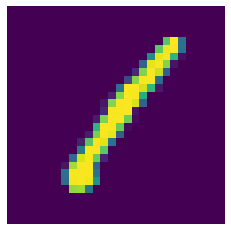

In [120]:
# 查看图像

x = train_data.iloc[:,1:]  # 特征值
y = train_data.iloc[:,0]   # 目标值

# 展示一行数据的图像，可以将其定义为方法
img_arr = np.array(x.iloc[0,:])
img_arr = img_arr.reshape(28,28)
plt.imshow(img_arr)
plt.axis("off")
plt.show()

In [121]:
# 数据基本处理

# 对数据进行归一化
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# 数据分割
x_train,x_var,y_train,y_var = train_test_split(x,y,test_size=0.25,random_state=20)

In [100]:
# 定义函数
# 多次使用PCA，确定最优参数n_components

import time

def optimal_parm(n_component,x_train,x_var,y_train,y_var):
    start = time.time()
    
    pca = PCA(n_components=n_component)
    pca.fit(x_train)
    
    # 进行降维
    x_train = pca.transform(x_train)
    x_var = pca.transform(x_var)
    
    # 对数据进行训练以及预测，从而确定最优参数
    svc = svm.SVC()
    svc.fit(x_train,y_train)
    accuracy = svc.score(x_var,y_var)
    
    end = time.time()
    
    print("参数n_components：{}，预测准确度：{}".format(n_component,accuracy))
    print("运行时间：{}".format(int(end-start)))
    
    return accuracy

参数n_components：0.6，预测准确度：0.9673333333333334
运行时间：30
参数n_components：0.6625，预测准确度：0.9723809523809523
运行时间：27
参数n_components：0.725，预测准确度：0.977047619047619
运行时间：29
参数n_components：0.7875，预测准确度：0.9795238095238096
运行时间：33
参数n_components：0.85，预测准确度：0.9804761904761905
运行时间：38


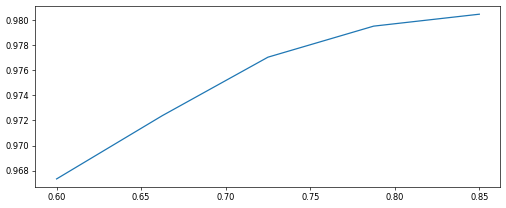

In [101]:
# 执行函数
# 进行确定最优函数

n_components = np.linspace(0.6,0.85,5)

accuracys = []

for n_component in n_components:
    accuracy = optimal_parm(n_component,x_train,x_var,y_train,y_var)
    accuracys.append(accuracy)
    
# 画图，直观
plt.figure(figsize=(10,4),dpi=60)
plt.plot(n_components,accuracys)
plt.show()

由上图确定，合适的参数n_components：0.77。注意：此处要考虑运行时间等因素，确定合适参数

In [129]:
# 使用n_components：0.77 进行PCA降维
pca = PCA(n_components=0.77)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_var_pca = pca.transform(x_var)

# 机器学习-SVM
svc = svm.SVC()
svc.fit(x_train_pca,y_train)
score = svc.score(x_var_pca,y_var)
print(score)


0.9791428571428571


### EM算法
- EM算法也称期望最大化(Expectation-Maximum,简称EM) 算法。它是一个基础算法，是很多机器学习领域算法的基础，比如隐式马尔科夫算法(HMM)等等。EM算法是一种迭代优化策略，由于它的计算方法中每一次迭代都分两步：其中一个为期望步(E步)，另一个为极大步(M步)。所以算法被称为EM算法(Expectation-Maximization Algorithm)。


- EM算法受到缺失思想影响，最初是为了解决数据缺失情况下的参数估计问题
    - 首先根据己经给出的观测数据，估计出模型参数的值
    - 然后再依据上一步估计出的参数值估计缺失数据的值，再根据估计出的缺失数据加上之前己经观测到的
    - 数据重新再对参数值进行估计
    - 然后反复迭代，直至最后收敛，迭代结束

### HMM
- 马尔科夫链：即状态空间中从一个状态到另一个状态转换的随机过程
    - 无记忆性质：下一状态的概率分布只能由当前状态决定，在时间序列中它前面的事件均与之无关
    - 在马尔可夫链的每一步，系统根据概率分布，可以从一个状态变到另-个状态，也可以保持当前状态
    - 状态的改变叫做转移，与不同的状态改变相关的概率叫做转移概率
    - 既然某一时刻状态转移的概率只依赖前-一个状态，那么只要求出系统中任意两个状态之间的转移概率，这个马尔科夫链的模型就定了

- HMM（隐马尔可夫模型）
    - HMM中提到的马尔可夫链是指隐含状态链
    - 可见状态链
    - 隐含状态链
    - 输出概率：隐含状态和可见状态之间有一个概率叫做输出概率
    - ![](./note_img/note_HMMexample.png)

#### HMM模型基础
- 什么样的问题需要HMM模型
    - 一般问题存在以下2个特征：
        - 基于序列的，例如：时间序列，或者状态序列
        - 存在两类数据：
            - 一类序列数据可观测到，即观测序列
            - 一类数据不可观测到，即隐藏状态序列（简称：状态序列）
    
    - 前向后向算法：评估观测序列概率
        - 前向算法
            - 本质上属于动态规划算法
            - 前向概率定义：定义时刻t时隐藏状态为qi,观测状态的序列为o1，o2，...，ot的概率为前向概率。记为：![](./note_img/note_front.png)
        - 后向算法
            - 后向算法和前向算法非常类似，都是用的动态规划，唯一的区别是选择的局部状态不同，后向算法用的是“后向概率”
    
    - 维特比算法：解码隐藏状态序列
    
    - 保姆-韦尔奇算法
        - 算法原理是EM算法原理

#### HMM的API
- https://hmmlearn.readthedocs.io/en/latest/
- hmmlearn实现了三种HMM模型类，按照观测状态是连续状态还是离散状态，可以分为两类。
    - GaussianHMM、GMMHMM：连续观测状态的HMM模型
    - MultinomialHMM：离散观测状态的模型
- MultinomialHMM()
    - 属性：
        - startprob_：隐藏初始分布Π
        - transmat_：状态转移矩阵A
        - emissionprob_：观测状态概率矩阵B

In [165]:
import math
import numpy as np
from hmmlearn import hmm

# 设定 隐藏状态
hiddenState = ["box1","box2","box3"]

# 设定 观测状态
observation = ["red","white"]

# 设定 初始状态分布
start_state = [0.2,0.4,0.4]

# 设定 状态转移矩阵
trans_state = [
                [0.5,0.2,0.3],
                [0.3,0.5,0.2],
                [0.2,0.3,0.5]
               ]

# 设定 观测状态分布矩阵
observ_prob = [
                [0.5,0.5],
                [0.4,0.6],
                [0.7,0.3]
               ]

# 设置模型
model = hmm.MultinomialHMM(n_components=len(hiddenState))
# 设置概率分布（即将概率值传入）
model.startprob_ = start_state
model.transmat_ = trans_state
model.emissionprob_ = observ_prob

# 设置 观测序列
obser = np.array([[0,1,0]])

# 查看 观测序列 代表的是什么观测状态
obser_str = map(lambda x:observation[x], obser.flatten())    # flatten()：转换为一维数组
print(list(obser_str))

# 进行观测
result = model.predict(obser)

# 查看 obser 出自哪一个盒子中
result_box = map(lambda x:hiddenState[x], result)
print(list(result_box))

# 评估观测序列的概率：表示在三个盒子中，出现 ['red', 'white', 'red'] 的概率为 0.13021800000000003
print(model.score(obser))   # 以e为底的对数
print(math.exp(model.score(obser)))

['red', 'white', 'red']
['box3', 'box3', 'box3']
-2.038545309915233
0.13021800000000003


### 集成学习进阶

#### xgboost算法原理
- XGBoost (Extreme Gradient Boosting)全名叫极端梯度提升树，XGBoost是集成学习方法的王牌，


- XGBoost和GBDT区别
    - 区别一
        - XGBoost生成CART树考虑了树的复杂度
        - GDBT未考虑，GDBT在树的剪枝步骤中考虑了树的复杂度
    - 区别二
        - XGBoost是拟合上一轮损失函数的二阶导展开
        - GDBT是拟合上一轮损失函数的一阶导展开
        - 因此，XGBoost的准确性更高，且满足相同的训练效果，需要的迭代次数更少
    - 区别三
        - XGBoost与GDBT都是逐次迭代来提高模型性能，但是XGBoost在选取最佳切分点时可以开启多线程进行，大大提高了运行速度


#### xgboost算法的API
- https://xgboost.readthedocs.io/en/latest/
- xgboost中封装了很多参数，主要有3种类型参数：通用参数（general parameters），Booster参数（booster parameters），学习目标参数（task parameters）
    - 通用参数：主要是宏观函数控制
    - Booster参数：取决于选择的Booster类型，用于控制每一步的booster（tree，regression等等）
    - 学习目标参数：控制训练的目标表现


- 通用参数
    - booster
        - 取值：'gbtree'，'gblinear'，'dart'。默认'gbtree'
        - gbtree和dart使用的是基于树的模型（dart主要多了Dropout），而gblinear使用线性函数
    - verbosity=0：不显示warnings信息
    - nthread
        - 并行运行xgboost的线程数，默认设置为CPU全部核心数


- Booster参数
    - Tree Booster参数
        - eta
            - 别名：learning_rate
            - 更新中减少的步长防止过拟合
            - 范围：[0,1]
        - gamma
            - 别名：min_split_loss
            - 在节点分裂时，只有分裂后损失函数的值下降了，才会分裂这个节点
            - Gamma指定了节点分裂所需的最小损失函数下降值。这个参数的值越大，算法越保守。这个参数的值和损失函数息息相关，所以              是需要调整的。
            - 范围：[0,+∞]
        - max_depth
            - 设置为0：代表没有限制
            - 这个值为树的最大深度。这个值也是用来避免过拟合的。max_depth越大，模型会学到更具体更局部的样本。
            - 范围：[0,+∞]
        - min_child_weight
            - 决定最小叶子节点样本权重和。XGBoost的这个参数是最小样本权重的和.
            - 当它的值较大时，可以避免模型学习到局部的特殊样本。但是如果这个值过高，会导致欠拟合。这个参数需要使用CV来调整
            - 范围：[0,+∞]
        - subsample
            - 这个参数控制对于每棵树，随机采样的比例。减小这个参数的值，算法会更加保守,避免过拟合。但是，如果这个值设置得过                小，它可能会导致欠拟合。
            - 典型值: 0.5-1,0.5代表平均采样，防止过拟合
            - 范围：(0,1]
        - colsample_bytree
            - 控制每颗随机采样的列数占比
        - colsample_bylevel
            - 控制每层的每次分裂，对列数的采样占比
        - lambda
            - 权重的L2正则化项(和Ridge regression类似)。这个参数是用来控制XGBoost的正则化部分的。虽然大部分数据科学家很少用到这个参数，但是这个参数在减少过拟合上还是可以挖掘出更多用处的。
        - alpha
            - 权重的L1正则化项。(和Lasso regression类似)。可以应用在很高维度 的情况下，使得算法的速度更快。
        - scale_pos_weight
            - 在各类别样本十分不平衡时，把这个参数设定为一个正值，可以使算法更快收敛。通常可以将其设置为负样本的数目与正样本数              目的比值。
    - Linear Booster参数
        - lambda
            - L2正则化惩罚系数
        - alpha
            - L1正则化惩罚系数
        - lambda_bias
            - 偏置上的L2正则化


- 学习目标参数
    - objective
        - "reg:linear"：线性回归
        - "reg:logistic" ：逻辑回归
        - "binary:logistic" ：二分类逻辑回归，输出为概率
        - "multi:softmax"：使用softmax的多分类器，返回预测的类别(不是概率)。在这种情况下，你还需要多设一个参数: num_class(类别数目)
        - "multi:softprob"：使用softmax的多分类器，返回每个数据属于各个类别的概率。
    - eval_metric
        - “rmse"：均方根误差
        - “mae"：平均绝对值误差
        - "logloss"：负对数似然函数值
        - "error"：二分类错误率。
            - 其值通过错误分类数目与全部分类数目比值得到。对于预测，预测值大于0.5被认为是正类，其它归为负类。
        - "error@t"：不同的划分阈值可以通过t进行设置
        - "merror"：多分类错误率，计算公式为(wrong cases)/(all cases)
        - “mlogloss"：多分类log损失
        - "auc"：曲线下的而和
    - seed：随机数种子

        
        
    

#### 案例：泰坦尼克号-基于XGBoost编写

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

<ipython-input-200-39ea58aad30b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["Age"] = data_train["Age"].fillna(value=data_train["Age"].mean())
<ipython-input-200-39ea58aad30b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Pclass"] = x["Pclass"].replace({1:"1",2:"2",3:"3"})
E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass

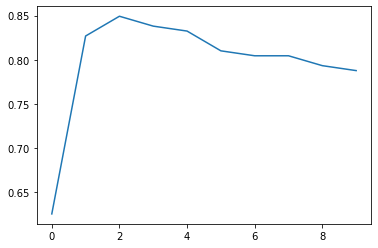

In [200]:
# 1、获取数据
data_train_origin = pd.read_csv("./data/Titanic/train.csv")


# 2、数据基本处理
# 2.1、获取需要的特征属性
data_train = data_train_origin[["Pclass","Sex","Age","Fare","Survived"]]

# 2.2、处理缺失值Age
data_train["Age"] = data_train["Age"].fillna(value=data_train["Age"].mean())

# 2.3、获取特征值和目标值
x = data_train[["Pclass","Sex","Age","Fare"]]
x["Pclass"] = x["Pclass"].replace({1:"1",2:"2",3:"3"})
y = data_train["Survived"]

# 2.3、数据分割。在此我们不对数据做分割，分为训练集和测试集。我们就把该data_train数据作为训练集，将data_test作为测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)


# 3、特征工程-特征提取、标准化
# 3.1、 特征提取：特征中出现类别符号，需要进⾏one-hot编码处理(两种方法：DictVectorizer()，pd.get_dummies())
dummies_train = pd.get_dummies(x_train[["Sex","Pclass"]])
dummies_test = pd.get_dummies(x_test[["Sex","Pclass"]])
# 3.1.1 将特征数据与one-hot数据进行连接
x_train = pd.concat([x_train,dummies_train],axis=1)
x_test = pd.concat([x_test,dummies_test],axis=1)
# 3.1.2 将转换了one-hot编码的列，进行删除
x_train.drop(labels=["Pclass","Sex"],axis=1,inplace=True)
x_test.drop(labels=["Pclass","Sex"],axis=1,inplace=True)

# 归一化
scaler = MinMaxScaler()
x_train[["Age","Fare"]] = scaler.fit_transform(x_train[["Age","Fare"]])
x_test[["Age","Fare"]] = scaler.fit_transform(x_test[["Age","Fare"]])


# 机器学习-XGBoost
# 对max_depth调优
scores = []
for i in range(10):
    estimator = XGBClassifier(max_depth=i,verbosity=0)
    estimator.fit(x_train,y_train)
    score = estimator.score(x_test,y_test)
    scores.append(score)

plt.plot([i for i in range(10)],scores)

#### 案例：otto-基于XGBoost编写

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,log_loss

In [256]:
# 1、获取数据
data = pd.read_csv("./data/Otto/train.csv")

# 2、数据基本处理
# 2.1、数据不平衡：过采样
smote = SMOTE()
x,y = smote.fit_resample(data.loc[:,"feat_1":"feat_93"],data["target"])
# 2.2、将目标值转换为数字
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

In [257]:
# 2.3、 分割数据：使用StratifiedShuffleSplit，具体使用https://blog.csdn.net/wuzhongqiang/article/details/101560889
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=20)
x_train,x_test,y_train,y_test = 0,0,0,0
for train_index,test_index in sss.split(x,y):
    x_train,x_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y[train_index],y[test_index]

In [258]:
# 3、特征工程
# 3.1、数据标准化
scaler = StandardScaler()
scaler.fit(x_train_pca)
x_train = scaler.transform(x_train_pca)
x_test = scaler.transform(x_test_pca)

# 3.2、 PCA降维
pca = PCA()
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [260]:
# 4、机器学习-XGBoost
estimator = XGBClassifier(n_jobs=-1)
estimator.fit(x_train_pca,y_train)

# 预测
y_pre_proba = estimator.predict_proba(x_test_pca)

# 5、模型评估：logloss评估
logloss = log_loss(y_test,y_pre_proba)
print(logloss)

##### 模型调优
- 将一个个参数依次进行调优

In [240]:
# n_estimators参数调优
logloss_n_estimator = []
n_estimators = [100,200,300,400,500,600]
for n_estimator in n_estimators:
    estimator = XGBClassifier(n_estimators=n_estimator,
                              max_depth=3,
                              learning_rate=0.1,
                              min_split_loss=1,
                              subsample=1,
                              objective="multi:softmax",num_class=9,n_jobs=-1)
    estimator.fit(x_train_pca,y_train)
    y_pre_proba = estimator.predict_proba(x_test_pca)
    logloss = log_loss(y_test,y_pre_proba)
    logloss_n_estimator.append(logloss)

# 画图
plt.plot(n_estimators,logloss_n_estimator)
plt.show()

In [ ]:
# max_depth参数调优
logloss_max_depth = []
max_depths = [1,3,5,10,20]
for max_depth in max_depths:
    estimator = XGBClassifier(n_estimators=10,
                              max_depth=max_depth,
                              learning_rate=0.1,
                              min_split_loss=1,
                              subsample=1,
                              objective="multi:softmax",num_class=9,n_jobs=-1)
    estimator.fit(x_train_pca,y_train)
    y_pre_proba = estimator.predict_proba(x_test_pca)
    logloss = log_loss(y_test,y_pre_proba)
    logloss_max_depth.append(logloss)

# 画图
plt.plot(max_depths,max_depths)
plt.show()

In [ ]:
# learning_rate参数调优
logloss_learning_rate = []
learning_rates = [0.1,0.3,0.5,0.7,0.9,1]
for learning_rate in learning_rates:
    estimator = XGBClassifier(n_estimators=10,
                              max_depth=3,
                              learning_rate=learning_rate,
                              min_split_loss=1,
                              subsample=1,
                              objective="multi:softmax",num_class=9,n_jobs=-1)
    estimator.fit(x_train_pca,y_train)
    y_pre_proba = estimator.predict_proba(x_test_pca)
    logloss = log_loss(y_test,y_pre_proba)
    logloss_learning_rate.append(logloss)

# 画图
plt.plot(learning_rates,logloss_learning_rate)
plt.show()

In [ ]:
# min_split_loss参数调优
logloss_min_split_loss = []
min_split_losss = [0.5,1,3,5,10]
for min_split_loss in min_split_losss:
    estimator = XGBClassifier(n_estimators=10,
                              max_depth=3,
                              learning_rate=0.1,
                              min_split_loss=min_split_loss,
                              subsample=1,
                              objective="multi:softmax",num_class=9,n_jobs=-1)
    estimator.fit(x_train_pca,y_train)
    y_pre_proba = estimator.predict_proba(x_test_pca)
    logloss = log_loss(y_test,y_pre_proba)
    logloss_min_split_loss.append(logloss)

# 画图
plt.plot(min_split_losss,logloss_min_split_loss)
plt.show()

In [ ]:
# subsample参数调优
logloss_subsample = []
subsamples = [0.1,0.3,0.5,0.7,0.9]
for n_estimator in n_estimators:
    estimator = XGBClassifier(n_estimators=10,
                              max_depth=3,
                              learning_rate=0.1,
                              min_split_loss=1,
                              subsample=subsample,
                              objective="multi:softmax",num_class=9,n_jobs=-1)
    estimator.fit(x_train_pca,y_train)
    y_pre_proba = estimator.predict_proba(x_test_pca)
    logloss = log_loss(y_test,y_pre_proba)
    logloss_subsample.append(logloss)

# 画图
plt.plot(subsamples,logloss_subsample)
plt.show()

#### lightGBM介绍
##### lightGBM的API
- pip install lightgbm
- Controll Parameters
    - ![](./note_img/note_lightgbm_controllparam.png)
- Core Parameters
    - ![](./note_img/note_lightgbm_coreparam.png)
- IO Parameters
    - ![](./note_img/note_lightgbm_ioparam.png)
- 调参建议
    - ![](./note_img/note_lightgbm_recommparam.png)

#### 案例：鸢尾花-基于lightGBM

In [62]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import lightgbm

In [88]:
# 获取数据
iris = load_iris()
x = iris["data"]
y = iris["target"]

# 数据基本处理
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
sss = StratifiedShuffleSplit(n_splits=1)
for train_index,test_index in sss.split(x,y):
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]

# 机器学习-lightbgm
model = lightgbm.LGBMRegressor()
model.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=3)
model.score(x_test,y_test)

[1]	valid_0's l2: 0.543884
Training until validation scores don't improve for 3 rounds
[2]	valid_0's l2: 0.445356
[3]	valid_0's l2: 0.368006
[4]	valid_0's l2: 0.302173
[5]	valid_0's l2: 0.246816
[6]	valid_0's l2: 0.206064
[7]	valid_0's l2: 0.169679
[8]	valid_0's l2: 0.139327
[9]	valid_0's l2: 0.118581
[10]	valid_0's l2: 0.0983371
[11]	valid_0's l2: 0.0812984
[12]	valid_0's l2: 0.0675149
[13]	valid_0's l2: 0.0561326
[14]	valid_0's l2: 0.0469201
[15]	valid_0's l2: 0.0402658
[16]	valid_0's l2: 0.0338748
[17]	valid_0's l2: 0.0288151
[18]	valid_0's l2: 0.0245169
[19]	valid_0's l2: 0.0209053
[20]	valid_0's l2: 0.0178735
[21]	valid_0's l2: 0.0155662
[22]	valid_0's l2: 0.0135097
[23]	valid_0's l2: 0.0120206
[24]	valid_0's l2: 0.0108764
[25]	valid_0's l2: 0.00965781
[26]	valid_0's l2: 0.00885547
[27]	valid_0's l2: 0.00800568
[28]	valid_0's l2: 0.00751852
[29]	valid_0's l2: 0.00713092
[30]	valid_0's l2: 0.00661137
[31]	valid_0's l2: 0.00647204
[32]	valid_0's l2: 0.00665373
[33]	valid_0's l2: 0.0

0.990930467231711

In [89]:
# 通过网格搜索进行训练
model = lightgbm.LGBMRegressor()
param = {"learning_rate":np.arange(0.1,1,0.05),"n_estimators":np.arange(10,200,5).astype(np.int)}
model_grid = GridSearchCV(model,param_grid=param,n_jobs=-1)
model_grid.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=3)

[1]	valid_0's l2: 0.543884
Training until validation scores don't improve for 3 rounds
[2]	valid_0's l2: 0.445356
[3]	valid_0's l2: 0.368006
[4]	valid_0's l2: 0.302173
[5]	valid_0's l2: 0.246816
[6]	valid_0's l2: 0.206064
[7]	valid_0's l2: 0.169679
[8]	valid_0's l2: 0.139327
[9]	valid_0's l2: 0.118581
[10]	valid_0's l2: 0.0983371
[11]	valid_0's l2: 0.0812984
[12]	valid_0's l2: 0.0675149
[13]	valid_0's l2: 0.0561326
[14]	valid_0's l2: 0.0469201
[15]	valid_0's l2: 0.0402658
[16]	valid_0's l2: 0.0338748
[17]	valid_0's l2: 0.0288151
[18]	valid_0's l2: 0.0245169
[19]	valid_0's l2: 0.0209053
[20]	valid_0's l2: 0.0178735
[21]	valid_0's l2: 0.0155662
[22]	valid_0's l2: 0.0135097
[23]	valid_0's l2: 0.0120206
[24]	valid_0's l2: 0.0108764
[25]	valid_0's l2: 0.00965781
[26]	valid_0's l2: 0.00885547
[27]	valid_0's l2: 0.00800568
[28]	valid_0's l2: 0.00751852
[29]	valid_0's l2: 0.00713092
[30]	valid_0's l2: 0.00661137
[31]	valid_0's l2: 0.00647204
[32]	valid_0's l2: 0.00665373
[33]	valid_0's l2: 0.0

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])})

In [90]:
model_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 35}

In [93]:
model = lightgbm.LGBMRegressor(learning_rate=0.1,n_estimators=35)
model.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=3)
model.score(x_test,y_test)

[1]	valid_0's l2: 0.543884
Training until validation scores don't improve for 3 rounds
[2]	valid_0's l2: 0.445356
[3]	valid_0's l2: 0.368006
[4]	valid_0's l2: 0.302173
[5]	valid_0's l2: 0.246816
[6]	valid_0's l2: 0.206064
[7]	valid_0's l2: 0.169679
[8]	valid_0's l2: 0.139327
[9]	valid_0's l2: 0.118581
[10]	valid_0's l2: 0.0983371
[11]	valid_0's l2: 0.0812984
[12]	valid_0's l2: 0.0675149
[13]	valid_0's l2: 0.0561326
[14]	valid_0's l2: 0.0469201
[15]	valid_0's l2: 0.0402658
[16]	valid_0's l2: 0.0338748
[17]	valid_0's l2: 0.0288151
[18]	valid_0's l2: 0.0245169
[19]	valid_0's l2: 0.0209053
[20]	valid_0's l2: 0.0178735
[21]	valid_0's l2: 0.0155662
[22]	valid_0's l2: 0.0135097
[23]	valid_0's l2: 0.0120206
[24]	valid_0's l2: 0.0108764
[25]	valid_0's l2: 0.00965781
[26]	valid_0's l2: 0.00885547
[27]	valid_0's l2: 0.00800568
[28]	valid_0's l2: 0.00751852
[29]	valid_0's l2: 0.00713092
[30]	valid_0's l2: 0.00661137
[31]	valid_0's l2: 0.00647204
[32]	valid_0's l2: 0.00665373
[33]	valid_0's l2: 0.0

0.990930467231711

#### 案例：《绝地求生》排名预测
- https://www.kaggle.com/c/pubg-finish-placement-prediction/data

In [1]:
import numpy as np    # 数据分析工具
import pandas as pd   # 数据分析工具
from pandas import DataFrame,Series
import matplotlib.pyplot as plt      # 画图
import seaborn as sns    # 画图工具
from sklearn.preprocessing import MinMaxScaler,StandardScaler   # 特征工程
from sklearn.decomposition import PCA    # PCA降维
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split,GridSearchCV    # 数据集划分、交叉验证网格搜索
import lightgbm
from sklearn.ensemble import RandomForestRegressor    # 随机森林
from sklearn.metrics import mean_absolute_error       # 模型评估

- 获取数据

In [2]:
# 获取数据
data = pd.read_csv("./data/PUGB/train_V2.csv")
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [3]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [4]:
# 查看有多少行数据
data.shape

(4446966, 29)

In [5]:
# 有多少场比赛
np.unique(data["matchId"]).shape

(47965,)

In [6]:
# 有多少支队伍
data["groupId"].unique().shape

(2026745,)

- 数据基本处理

In [3]:
# 缺失值处理
# data.isnull().any()    # 发现 winPlacePerc列 存在缺失值
# 查看缺失值在哪一行
index_null = data[data["winPlacePerc"].isnull()].index
# 删除缺失值所在行
data.drop(labels=index_null,inplace=True)

In [4]:
# 查看每场比赛参加的人数
count = data.groupby("matchId")["matchId"].transform("count")
data["playerJoined"] = count

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


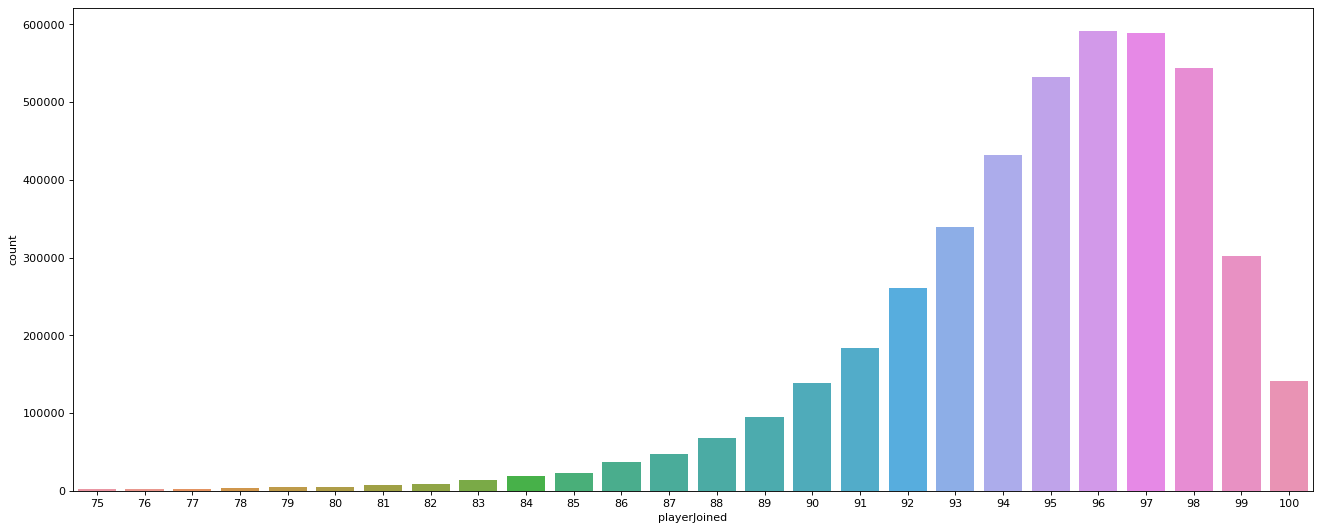

In [5]:
# 画图展示，>=75人
plt.figure(figsize=(20,8),dpi=80)
sns.countplot(data[data["playerJoined"] >= 75]["playerJoined"])
plt.show()

In [6]:
# 规范化输出部分数据
data["killsNorm"] = data["kills"] * ((100-data["kills"])/100 + 1)
data["damageDealtNorm"] = data["damageDealt"] * ((100-data["damageDealt"])/100 + 1)
data["maxPlaceNorm"] = data["maxPlace"] * ((100-data["maxPlace"])/100 + 1)
data["matchDurationNorm"] = data["matchDuration"] * ((100-data["matchDuration"])/100 + 1)

In [7]:
# 部分数据的合成
data["healsAndboosts"] = data["heals"] + data["boosts"]

- 异常值处理

In [8]:
# 删除有击杀，但是没有移动距离的玩家
data["totalDistance"] = data["rideDistance"] + data["walkDistance"] + data["swimDistance"]
data["killsWithoutDistance"] = (data["kills"] > 0) & (data["totalDistance"] == 0)
index_cheat = data[data["killsWithoutDistance"] == True].index
data.drop(labels=index_cheat,inplace=True)

In [9]:
# 删除驾车杀敌异常玩家-例如：驾车杀敌10人及以上
data = data[data["roadKills"] < 10]

In [10]:
# 删除玩家在一局中杀敌30人以上
data = data[data["kills"] < 30]

In [11]:
# 删除爆头率异常数据
data["headshot_rate"] = data["headshotKills"]/data["kills"]
data["headshot_rate"] = data["headshot_rate"].fillna(0)
index_headshot_excp = data[(data["headshot_rate"] == 1) & (data["kills"] >= 10)].index
data.drop(index_headshot_excp,inplace=True)

In [12]:
# 删除最远距离杀敌数据
index_longestkill = data[data["longestKill"] >= 1000].index
data.drop(index_longestkill,inplace=True)

In [13]:
# 删除运动距离异常数据

# 行走异常
index_walk = data[data["walkDistance"] >= 10000].index
data.drop(index_walk,inplace=True)

# 驾车异常
index_ride = data[data["rideDistance"] >= 20000].index
data.drop(index_ride,inplace=True)

# 游泳异常
index_swim = data[data["swimDistance"] >= 20000].index
data.drop(index_swim,inplace=True)

In [14]:
# 删除武器收集异常
index_weapon = data[data["weaponsAcquired"] > 15].index
data.drop(index_weapon,inplace=True)

In [15]:
# 删除使用药品异常数据
index_drug = data[data["heals"] >= 40].index
data.drop(index_drug,inplace=True)

- 类别型数据处理，转换成one-hot编码

In [16]:
matchType_onehot = pd.get_dummies(data[["matchType"]])
data = pd.concat([data,matchType_onehot],axis=1)
data.drop(["matchType"],axis=1,inplace=True)   # 转换one-hot后，将该列删除

In [17]:
# 对groupId，matchId进行处理

# .cat.codes：将Category类型中的字符串类型，变成数字类型
data["groupId"] = data["groupId"].astype("category").cat.codes
data["matchId"] = data["matchId"].astype("category").cat.codes

- 数据截取

In [18]:
# 截取100000份数据
data_sample = data.sample(100000)

In [32]:
# 确定特征值和目标值
x = data_sample.drop(["Id","winPlacePerc"],axis=1)
y = data_sample["winPlacePerc"]

In [27]:
# 分割数据
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

- 模型训练-随机森林

In [29]:
# 模型训练
m1 = RandomForestRegressor()

m1.fit(x_train, y_train)

# 预测
y_pre = m1.predict(x_test)

# 模型评估
score = m1.score(x_test,y_test)
mae = mean_absolute_error(y_test,y_pre)
print("准确率：",score)
print("绝对平均误差：",mae)

准确率： 0.9217953373004363
绝对平均误差： 0.060524666049999995


- 再次使用随机森林，进行模型训练
    - 特征选择

In [22]:
# 查看特征的重要性
m1.feature_importances_

array([5.91292763e-03, 5.90652227e-03, 1.16425212e-03, 4.27031610e-03,
       3.36905811e-03, 4.25582003e-03, 3.68275788e-04, 1.53854205e-03,
       1.76390867e-01, 2.11370054e-03, 3.43696887e-03, 2.69098346e-03,
       6.08178633e-03, 7.07729909e-03, 3.38300129e-03, 9.66370814e-03,
       3.56074523e-03, 6.76920535e-04, 2.39048462e-03, 3.89164626e-05,
       6.09200442e-04, 1.97028174e-04, 7.82132419e-05, 6.87860281e-01,
       3.30938620e-03, 2.39837369e-03, 2.00499722e-02, 3.29327922e-03,
       3.39389342e-03, 3.35454339e-03, 8.05196755e-03, 2.56774280e-03,
       1.70518893e-02, 0.00000000e+00, 6.87684466e-04, 1.46469713e-05,
       6.91075828e-07, 2.66761503e-04, 4.00992225e-04, 4.17562282e-07,
       7.95764543e-06, 8.39161729e-07, 5.17454642e-05, 4.32438101e-08,
       1.59222972e-05, 3.93531253e-08, 1.62623545e-04, 1.18667126e-04,
       2.34282911e-04, 1.02238612e-03, 5.07432170e-04])

<AxesSubplot:ylabel='feature'>

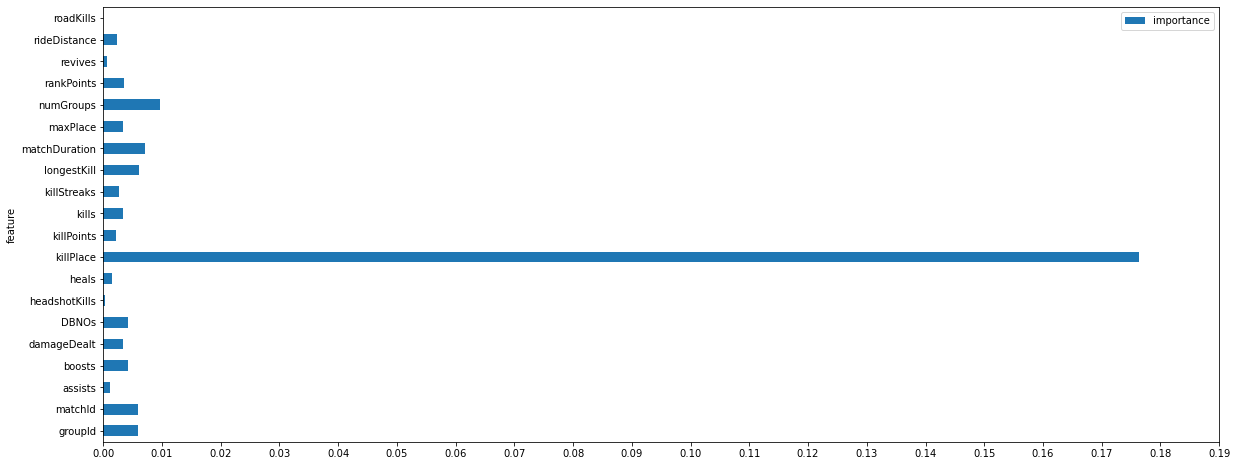

In [23]:
# 画图展示
x_axis = x.columns
y_axis = m1.feature_importances_
df_feature_importance = DataFrame({"feature":x_axis,"importance":y_axis})
df_feature_importance[:20].plot(x="feature",y="importance",figsize=(20,8),kind="barh",xticks=np.arange(0,0.2,0.01))

- 由上图可知，选择 importance > 0.003

In [24]:
feature_selec = df_feature_importance[df_feature_importance["importance"] > 0.003]["feature"]

In [25]:
# 使用选择了的特征进行训练
x_selec = x[feature_selec]

# 数据分割
x_selec_train,x_selec_test,y_train,y_test = train_test_split(x_selec,y,test_size=0.2,random_state=20)

# 模型训练-随机森林
m2 = RandomForestRegressor()
m2.fit(x_selec_train,y_train)

# 预测
y_pre = m2.predict(x_selec_test)

# 模型评估
score = m2.score(x_selec_test,y_test)
mae = mean_absolute_error(y_test,y_pre)
print(score)
print(mae)

0.9209287230476826
0.0608916298


- 模型训练-lightGBM

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

# 模型训练
m3 = lightgbm.LGBMRegressor()
m3.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric="l1",early_stopping_rounds=5)

# 预测
y_pre = m3.predict(x_test,num_iteration=m3.best_iteration_)

mae = mean_absolute_error(y_test,y_pre)
print(mae)

[1]	valid_0's l1: 0.24391	valid_0's l2: 0.0789741
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.223039	valid_0's l2: 0.0664666
[3]	valid_0's l1: 0.204363	valid_0's l2: 0.0562724
[4]	valid_0's l1: 0.187818	valid_0's l2: 0.0479362
[5]	valid_0's l1: 0.173148	valid_0's l2: 0.0411386
[6]	valid_0's l1: 0.160251	valid_0's l2: 0.0356151
[7]	valid_0's l1: 0.148695	valid_0's l2: 0.0310183
[8]	valid_0's l1: 0.138423	valid_0's l2: 0.0272162
[9]	valid_0's l1: 0.129428	valid_0's l2: 0.0241452
[10]	valid_0's l1: 0.121519	valid_0's l2: 0.0216036
[11]	valid_0's l1: 0.114692	valid_0's l2: 0.0195416
[12]	valid_0's l1: 0.108487	valid_0's l2: 0.0177336
[13]	valid_0's l1: 0.103167	valid_0's l2: 0.0163117
[14]	valid_0's l1: 0.0985053	valid_0's l2: 0.0151055
[15]	valid_0's l1: 0.0943084	valid_0's l2: 0.0140779
[16]	valid_0's l1: 0.0906443	valid_0's l2: 0.0132113
[17]	valid_0's l1: 0.087288	valid_0's l2: 0.0124363
[18]	valid_0's l1: 0.0844722	valid_0's l2: 0.0118388
[19]	valid

In [98]:
# 使用网格搜索进行调优
estimator = lightgbm.LGBMRegressor()
param = {"learning_rate":[0.01,0.05,0.1],"n_estimators":[10,100,300]}
m4 = GridSearchCV(estimator,param_grid=param,n_jobs=-1)
m4.fit(x_train,y_train)

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 100, 300]})

In [99]:
m4.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [100]:
y_pre = m4.predict(x_test)
mae = mean_absolute_error(y_test,y_pre)
print(mae)

0.05768016787811854
